# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
all_people = ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014',]

In [5]:
# X_all, y_all, subj_all, ts_all, hr_all = load_all_data(all_subjects)

In [6]:
X_all_p, y_all_p, subj_all_p, ts_all_p, hr_all_p = load_all_data(all_people)

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 1013's data
Loading 1014's data
Finished loading


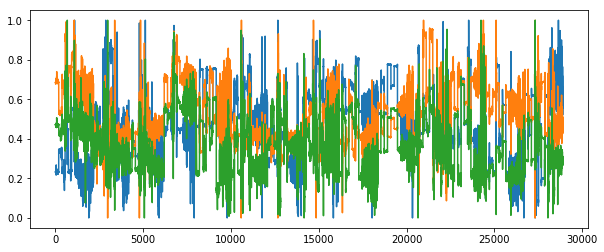

In [7]:
cols = ['x', 'y', 'z']

xyz = []

for i in range(3):
    xyz.append([a[i] for a in X_all_p])
    
# x1 = [a[1] for a in X_all]
# x2 = [a[2] for a in X_all]

# f, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6))
plt.figure(figsize=(10, 4))

for i in range(3):
    plt.plot(xyz[i])
    
plt.show()

# Data Preprocessing

In [8]:
%run preprocessing.ipynb

# Find proper thresholds of walk activity

## Patients

In [9]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

all_subjects = all_people

In [10]:
df_rpy

id         x         y         z  label
0      1001  0.232240  0.684961  0.471288      2
1      1001  0.231985  0.686028  0.469237      2
2      1001  0.232240  0.686242  0.470903      2
3      1001  0.232751  0.686135  0.470903      2
4      1001  0.232751  0.685495  0.471928      2
5      1001  0.233091  0.686562  0.471288      2
6      1001  0.232240  0.686775  0.472441      2
7      1001  0.232240  0.686028  0.471288      2
8      1001  0.229858  0.685068  0.473979      2
9      1001  0.230368  0.685068  0.468211      2
10     1001  0.231730  0.686988  0.472954      2
11     1001  0.231134  0.685495  0.471928      2
12     1001  0.233346  0.687628  0.469621      2
13     1001  0.233601  0.676747  0.471288      2
14     1001  0.232921  0.679201  0.467186      2
15     1001  0.231730  0.688908  0.468468      2
16     1001  0.232410  0.688162  0.467570      2
17     1001  0.231985  0.685175  0.467570      2
18     1001  0.231645  0.685495  0.465776      2
19     1001  0.230198  0.687308  0.466545      2
20     1001  0.234537  0.685388  0.467699      2
21     1001  0.231645  0.683148  0.463725      2
22     1001  0.228412  0.684321  0.469109      2
23     1001  0.231559  0.685495  0.460264      2
24     1001  0.232155  0.680908  0.464879      2
25     1001  0.233942  0.686348  0.463469      2
26     1001  0.229007  0.689869  0.465648      2
27     1001  0.230539  0.687202  0.462956      2
28     1001  0.231219  0.686882  0.464238      2
29     1001  0.233601  0.689762  0.462699      2
...     ...       ...       ...       ...    ...
28868  1014  0.644481  0.523161  0.307035      3
28869  1014  0.788456  0.519867  0.278978      3
28870  1014  0.545002  0.451023  0.276182      3
28871  1014  0.596090  0.488245  0.313263      3
28872  1014  0.651223  0.435377  0.345164      3
28873  1014  0.718641  0.479845  0.296232      3
28874  1014  0.592344  0.486433  0.291179      3
28875  1014  0.598037  0.530572  0.287748      3
28876  1014  0.611072  0.531889  0.298901      3
28877  1014  0.556538  0.529913  0.330929      3
28878  1014  0.719989  0.552147  0.334615      3
28879  1014  0.596989  0.490880  0.285079      3
28880  1014  0.578112  0.464034  0.269446      3
28881  1014  0.610622  0.511467  0.293849      3
28882  1014  0.652122  0.478034  0.300807      3
28883  1014  0.654519  0.464199  0.295977      3
28884  1014  0.614667  0.457117  0.290163      3
28885  1014  0.602082  0.484951  0.270844      3
28886  1014  0.558186  0.504714  0.304366      3
28887  1014  0.606427  0.463870  0.292578      3
28888  1014  0.764935  0.434224  0.281139      3
28889  1014  0.580209  0.466669  0.312881      3
28890  1014  0.553691  0.440483  0.267667      3
28891  1014  0.599236  0.473916  0.305637      3
28892  1014  0.617813  0.485115  0.282283      3
28893  1014  0.661710  0.511302  0.301697      3
28894  1014  0.620210  0.462223  0.281647      3
28895  1014  0.521330  0.426319  0.310594      3
28896  1014  0.640586  0.472928  0.265506      3
28897  1014  0.615716  0.476222  0.306018      3

[28898 rows x 5 columns]

In [11]:
df_walk = df_rpy[df_rpy['label']==label_dict['walk']]
df_walk = df_walk.reset_index(drop=True)

In [12]:
df_nonwalk = df_rpy[df_rpy['label']!=label_dict['walk']]
df_nonwalk = df_nonwalk.reset_index(drop=True)

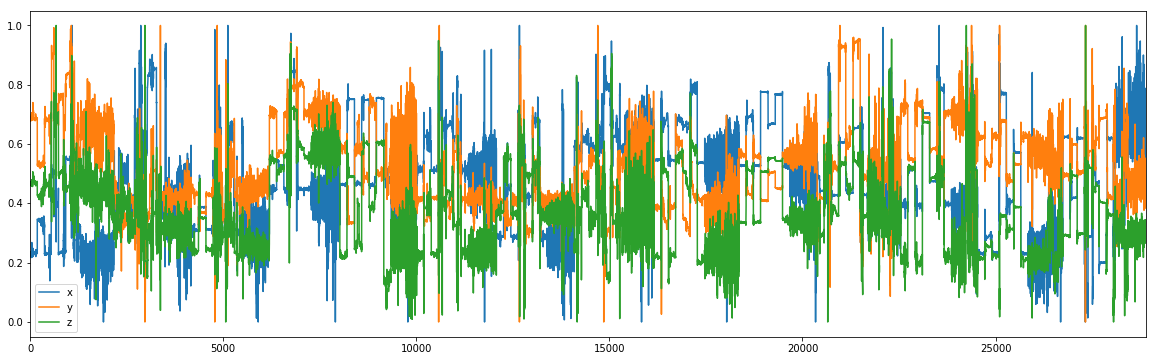

In [13]:
cols = ['x','y','z']

df_rpy[cols].plot(figsize=(20,6))
plt.show()

x
y
z


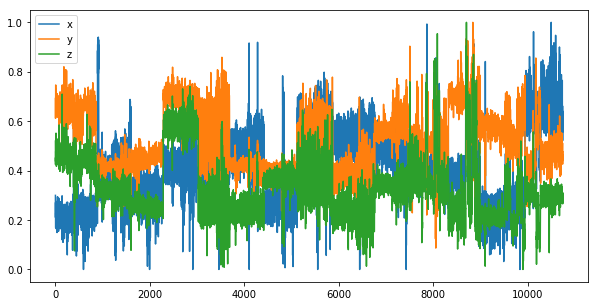

In [32]:
cols = ['x','y','z']

plt.figure(figsize=(10,5))

for i, c in enumerate(cols):
    print(c)
    plt.plot(df_walk[c], label=c)

plt.legend(loc='upper left')

plt.show()

x
y
z


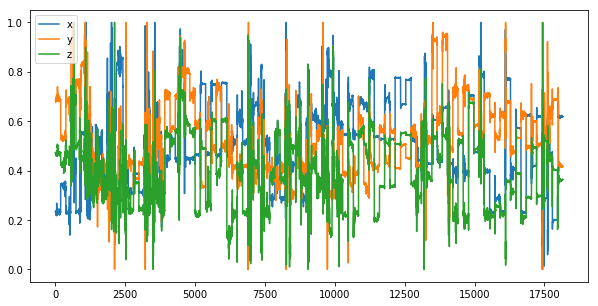

In [33]:
cols = ['x','y','z']

plt.figure(figsize=(10,5))

for i, c in enumerate(cols):
    print(c)
    plt.plot(df_nonwalk[c], label=c)

plt.legend(loc='upper left')

plt.show()

1001


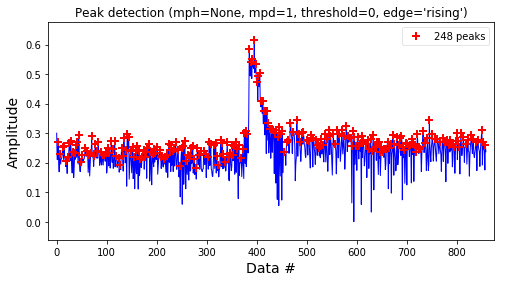

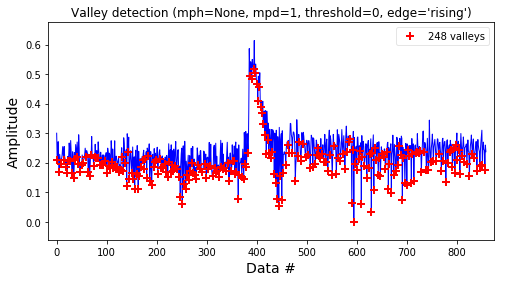

x 0.06512675831618112


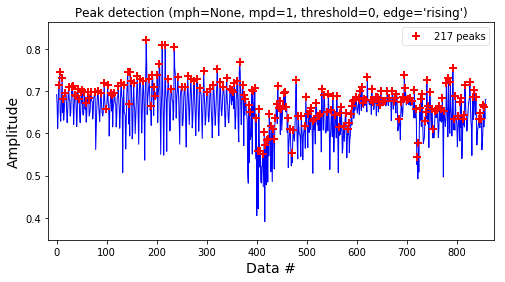

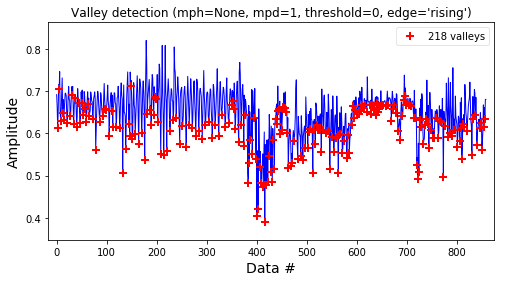

y 0.0696589102637919


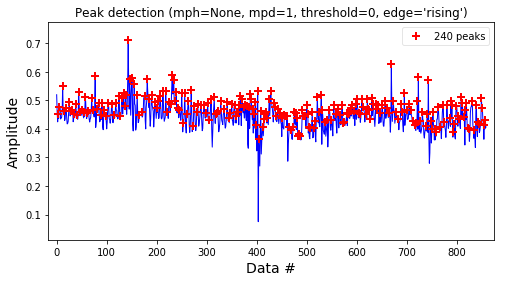

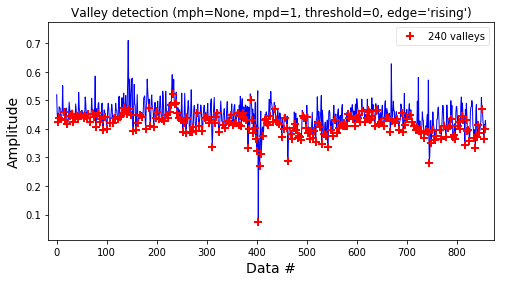

z 0.044398511995027395
1002


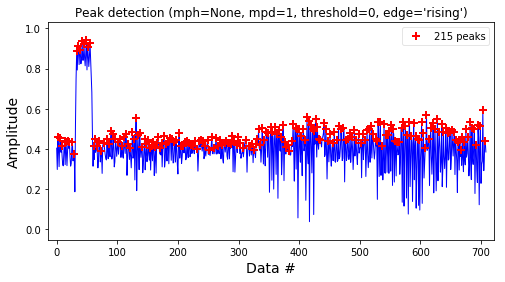

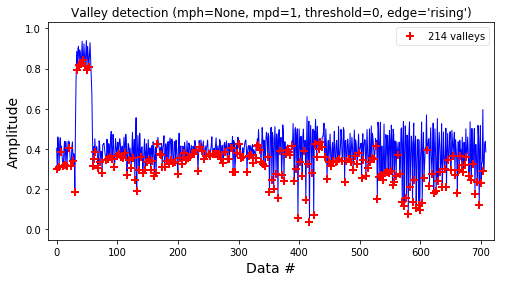

x 0.12697837610345172


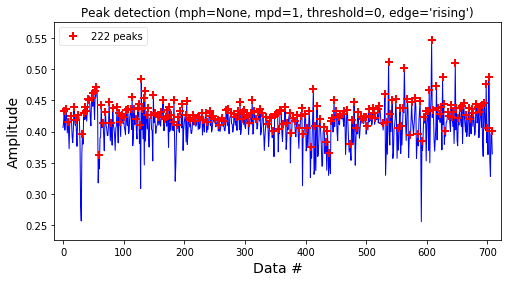

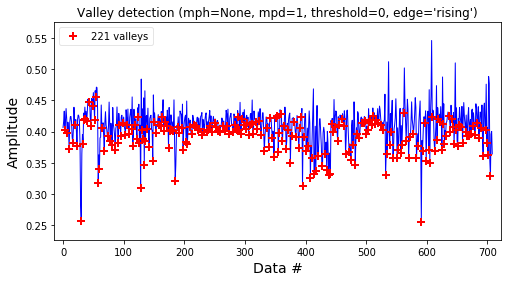

y 0.030001515660192213


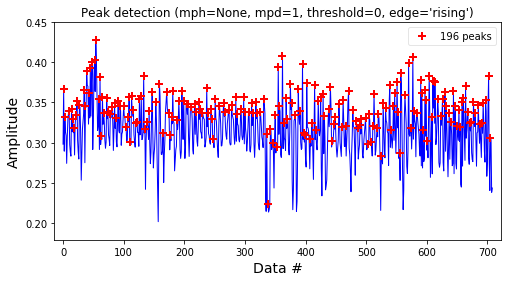

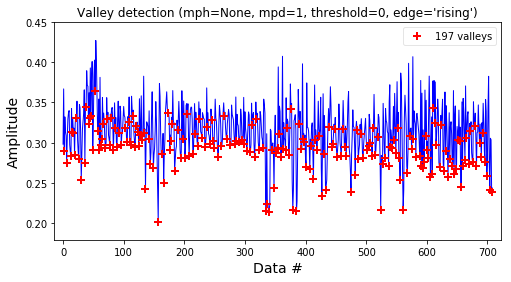

z 0.04775947300504929
1003


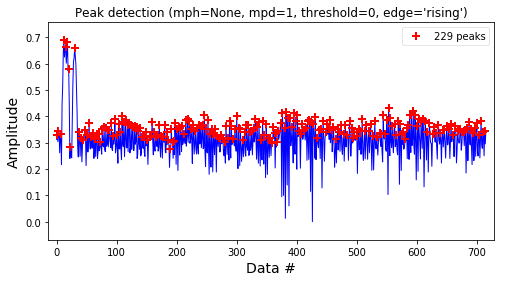

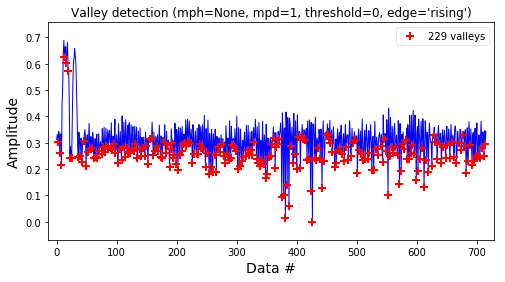

x 0.09267397466572191


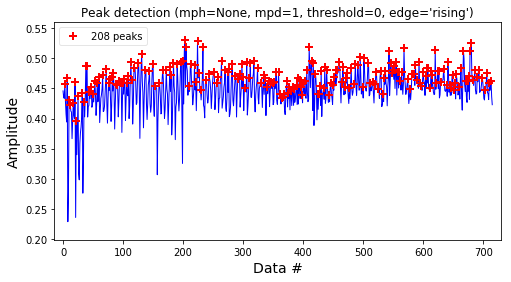

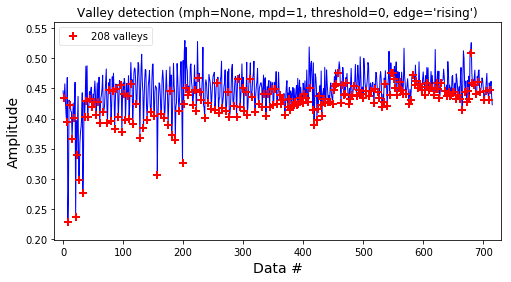

y 0.033441107077621324


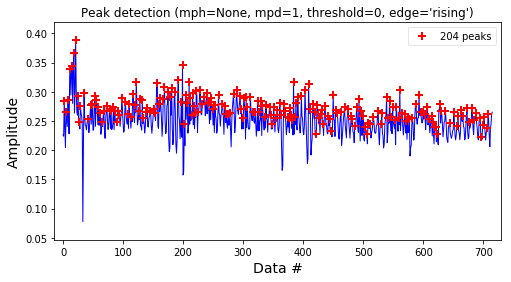

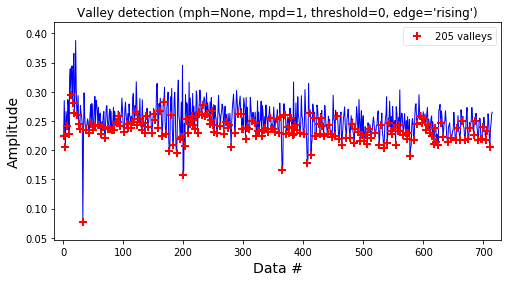

z 0.035178302238023415
1004


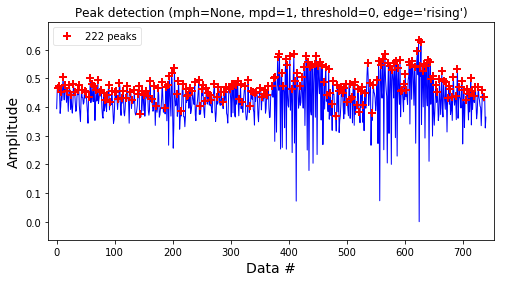

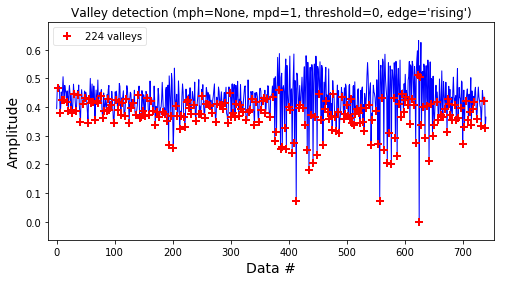

x 0.08872356815514804


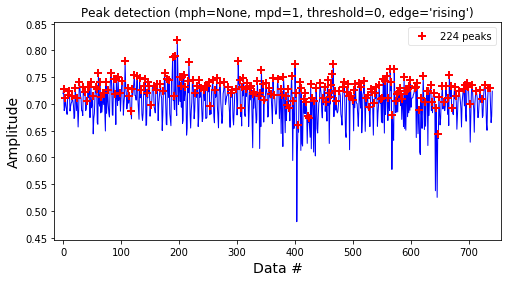

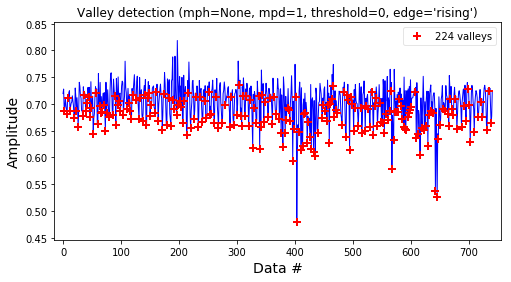

y 0.047395202186091834


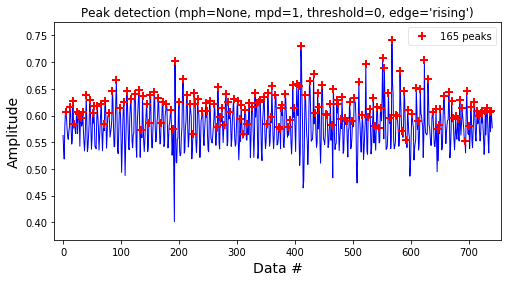

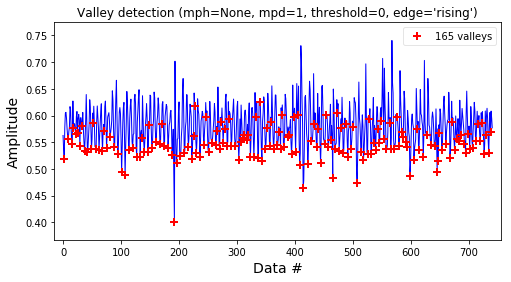

z 0.06978485107287269
1005


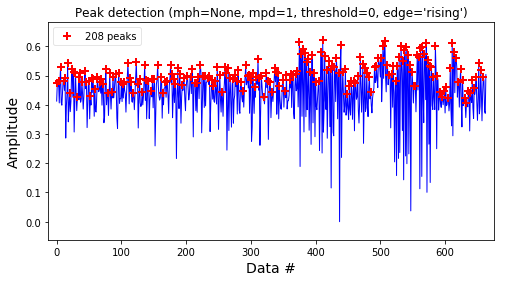

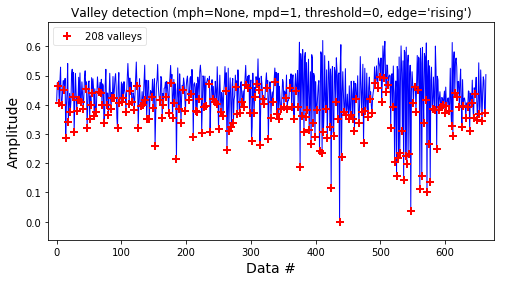

x 0.12164365277701703


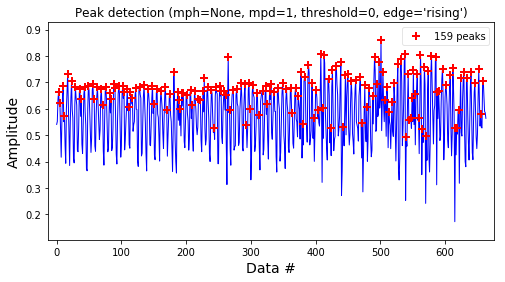

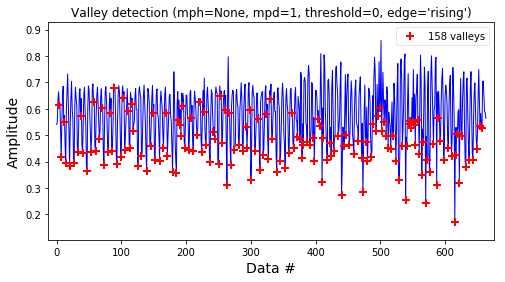

y 0.2082262222081249


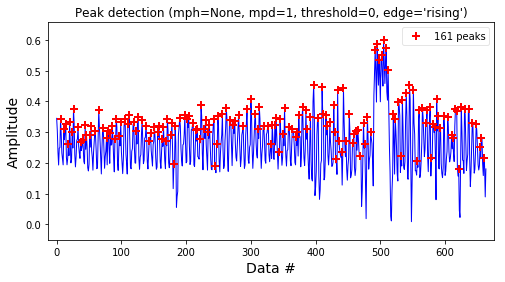

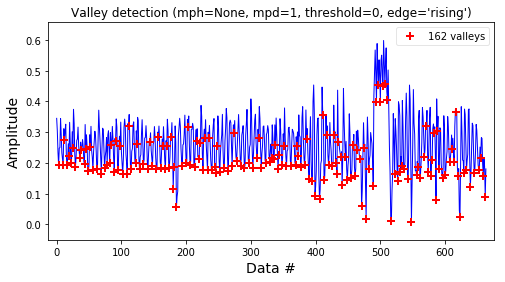

z 0.11766380904208196
1006


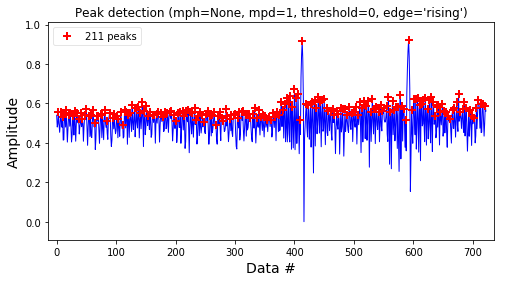

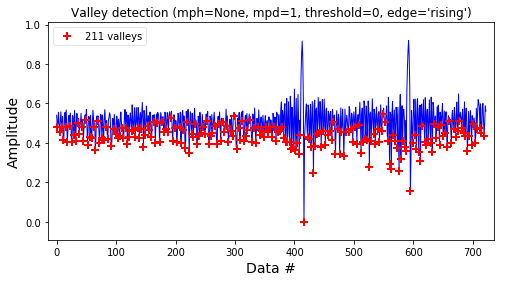

x 0.13289219771312671


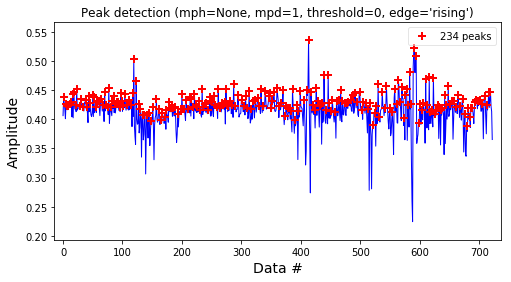

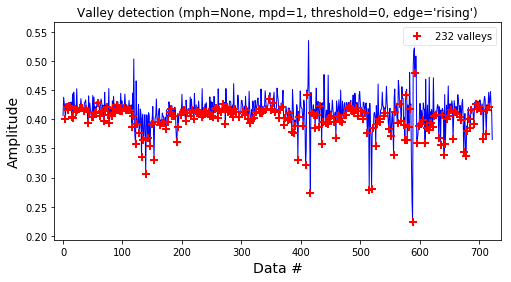

y 0.024621817994958967


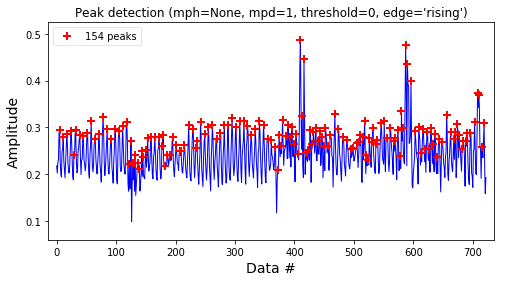

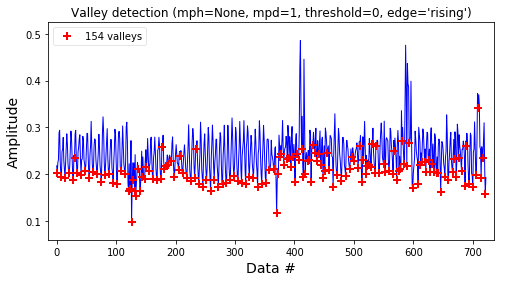

z 0.07752392737863112
1007


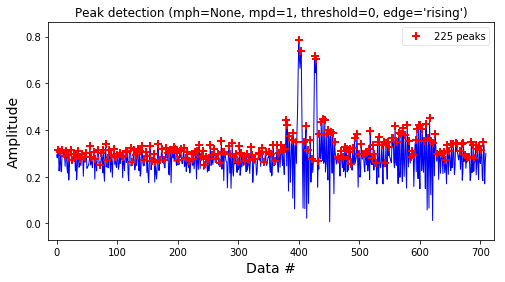

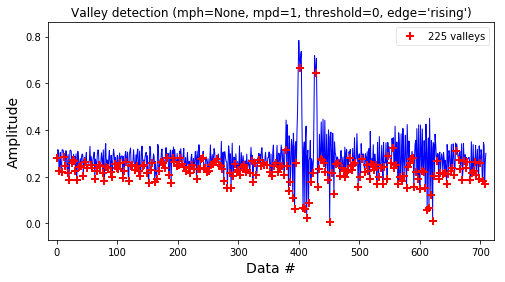

x 0.082649002799282


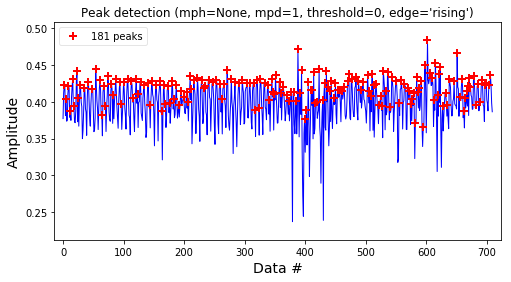

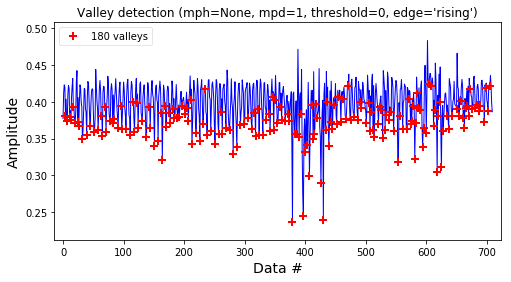

y 0.04258962845776776


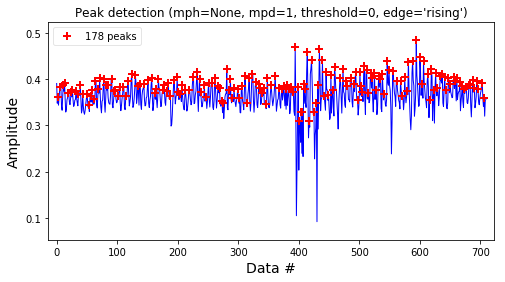

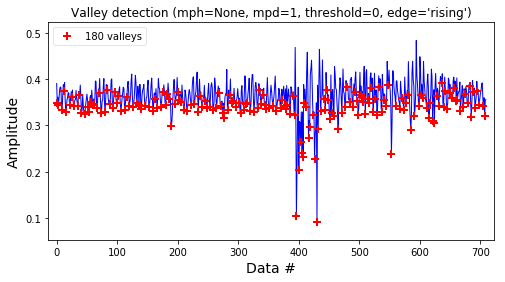

z 0.043212946643139516
1008


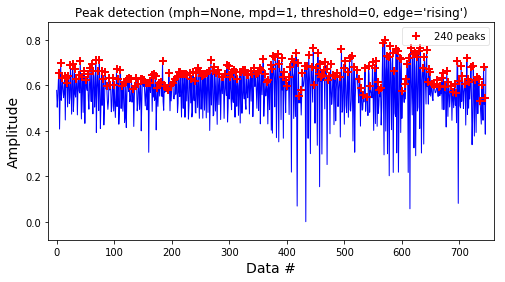

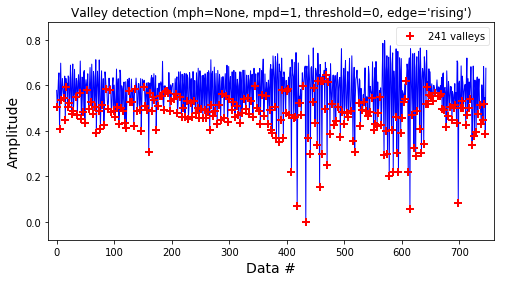

x 0.1709687419980216


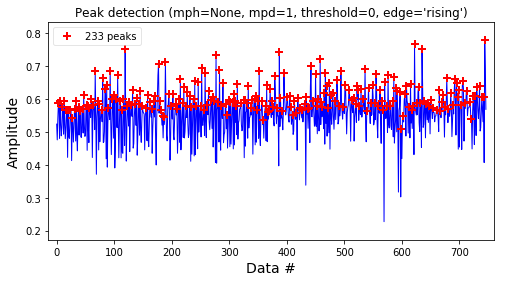

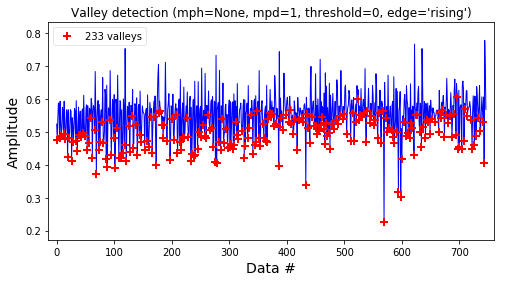

y 0.10942066402046668


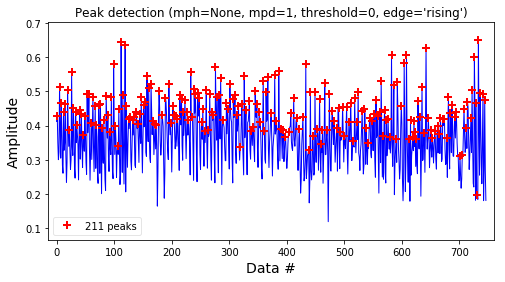

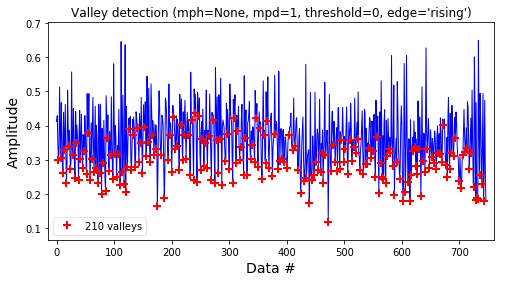

z 0.15226204406859206
1009


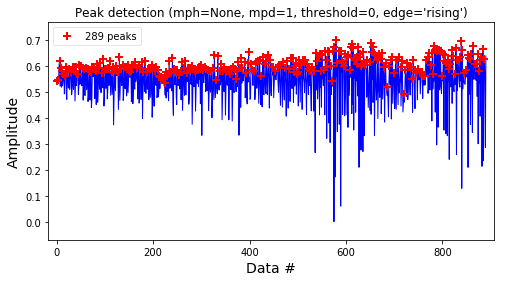

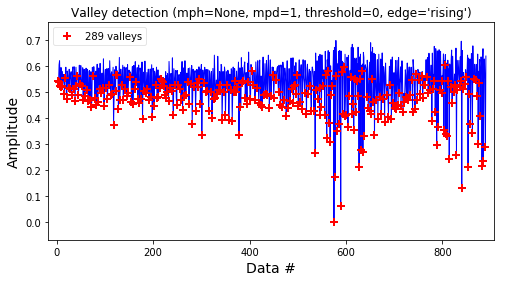

x 0.12152342999975602


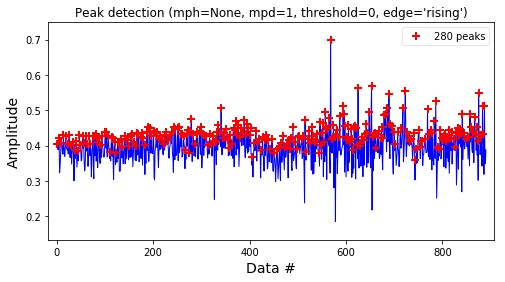

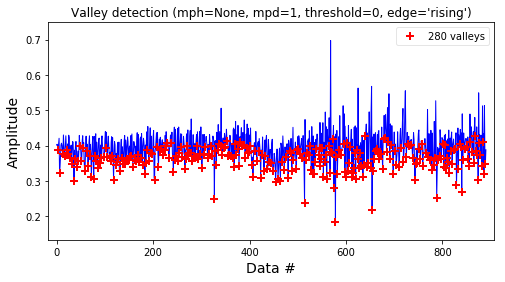

y 0.061430213155347274


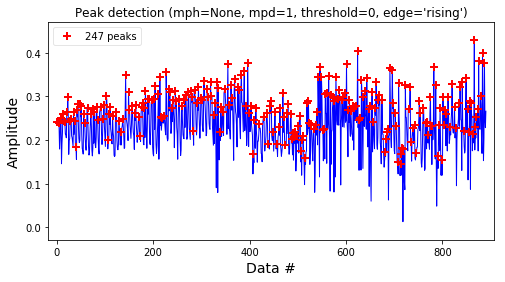

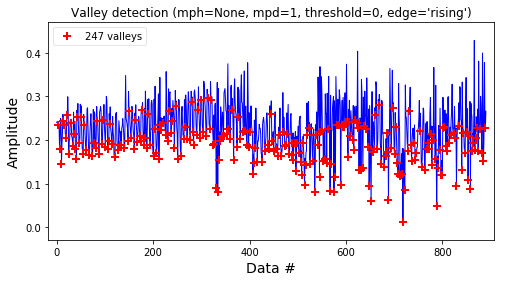

z 0.0774585199370271
1010


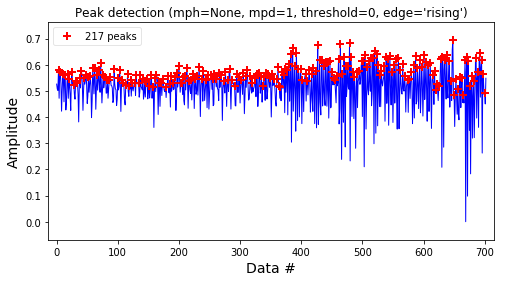

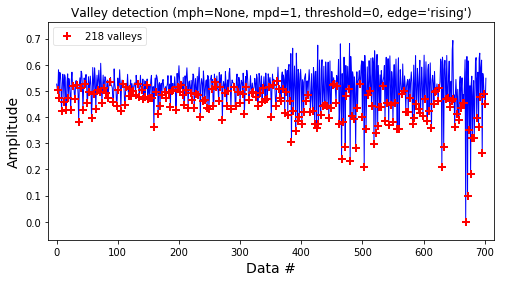

x 0.11124111259607472


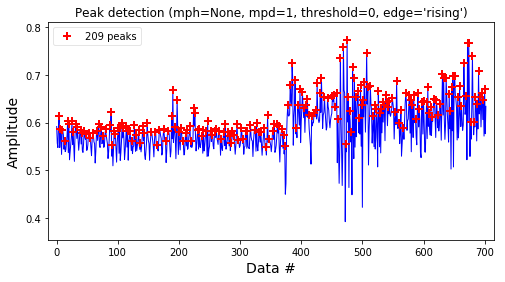

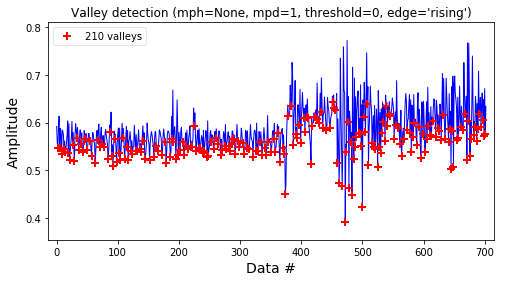

y 0.05467973327597431


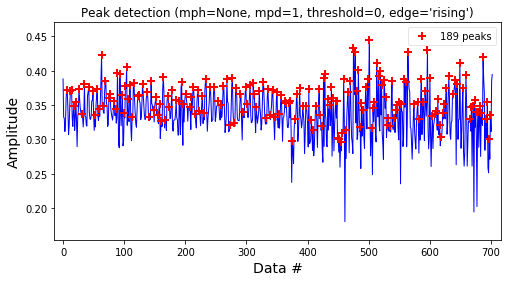

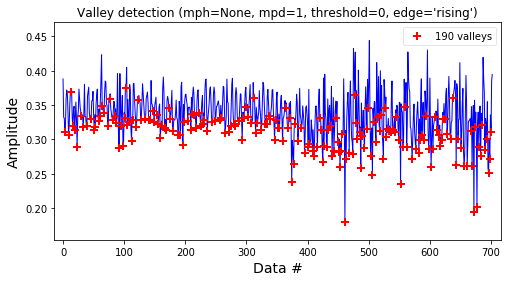

z 0.0468708473125003
1011


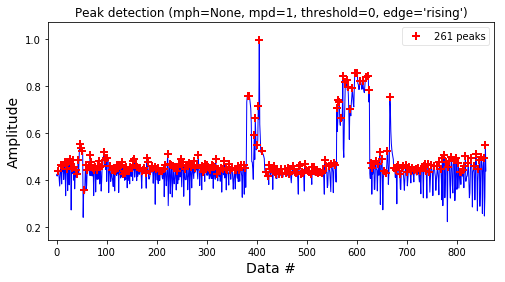

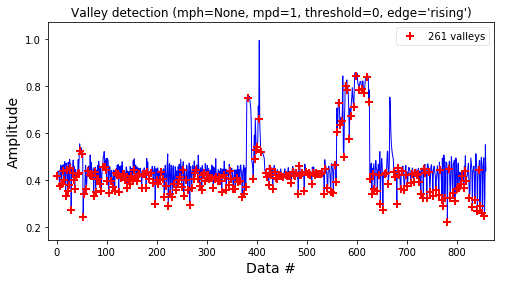

x 0.05697206722011516


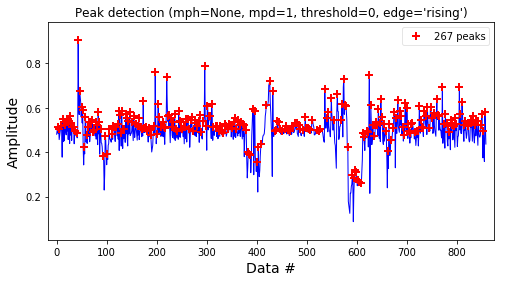

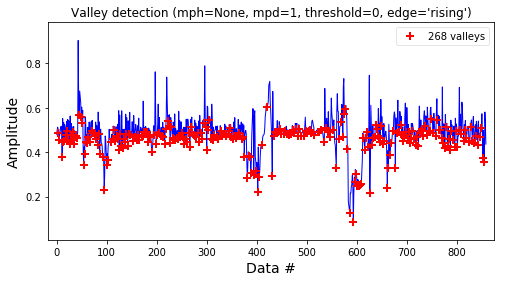

y 0.060990057410890586


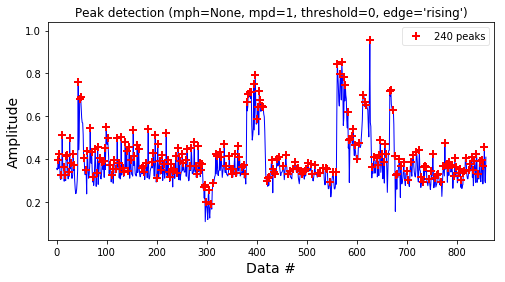

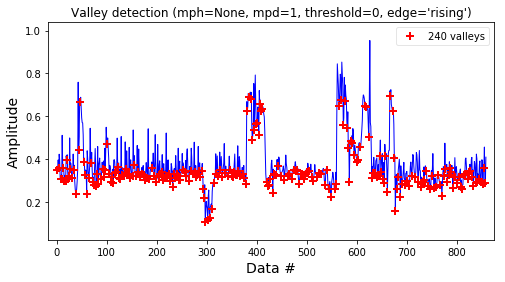

z 0.06222208822369191
1012


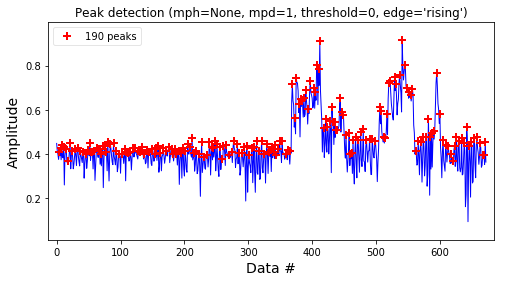

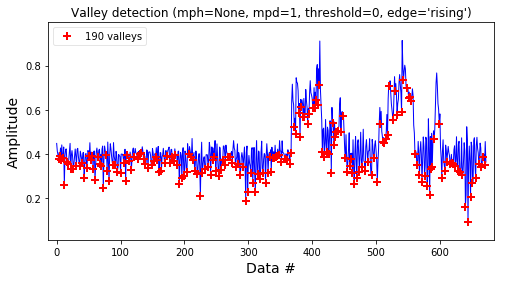

x 0.0890597834821103


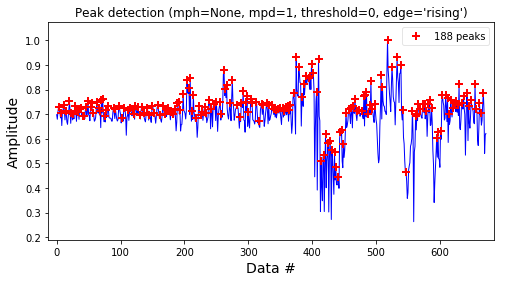

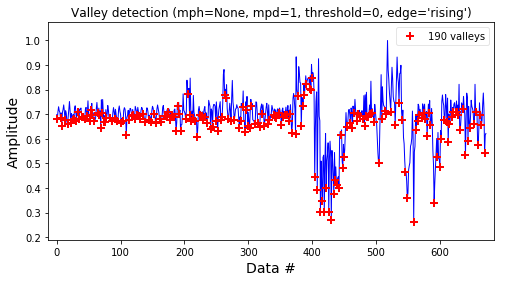

y 0.057082558800646666


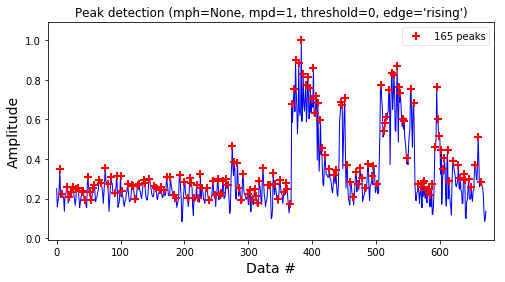

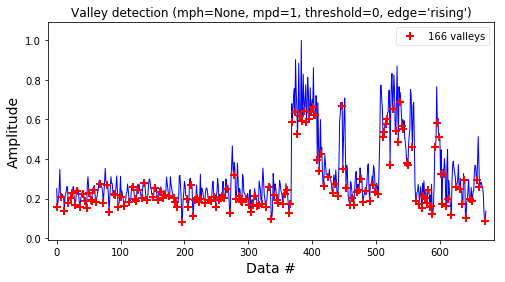

z 0.07934567631913131
1013


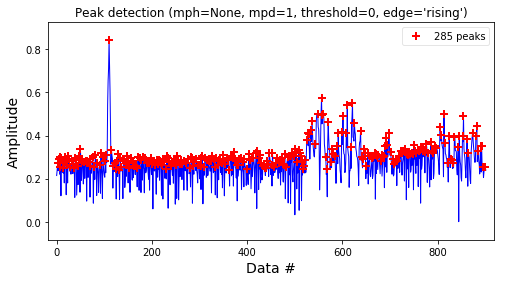

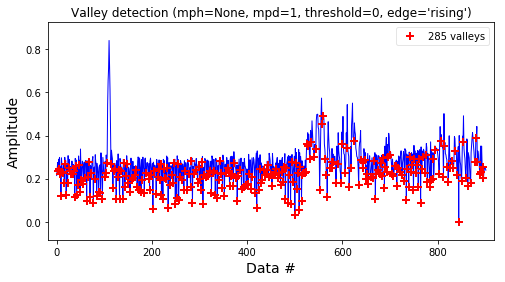

x 0.08710547932969948


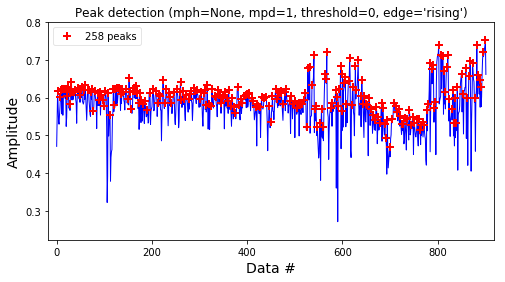

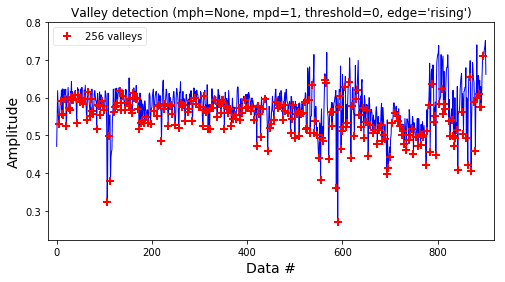

y 0.046336283230214104


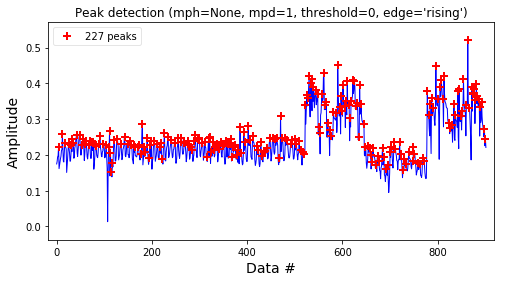

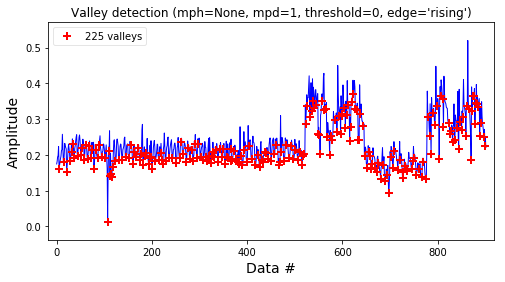

z 0.044981907801214055
1014


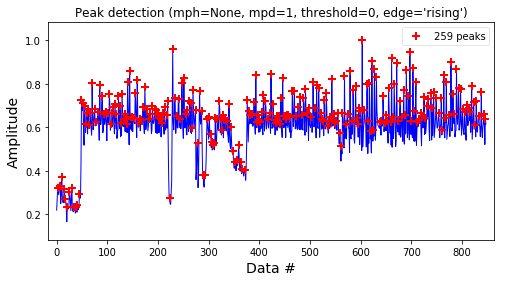

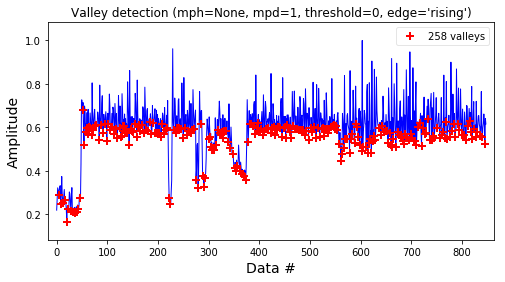

x 0.10127719077101638


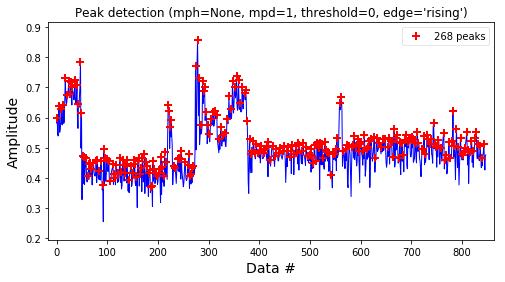

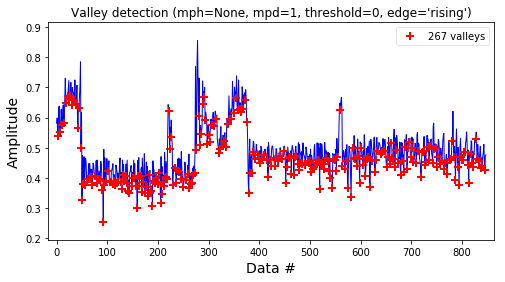

y 0.05496767574617989


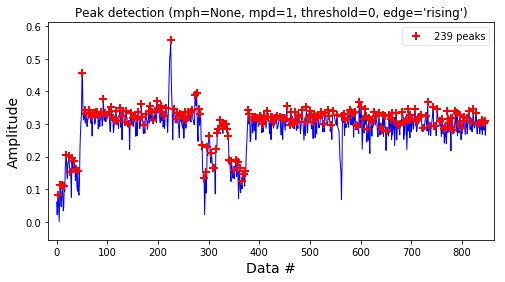

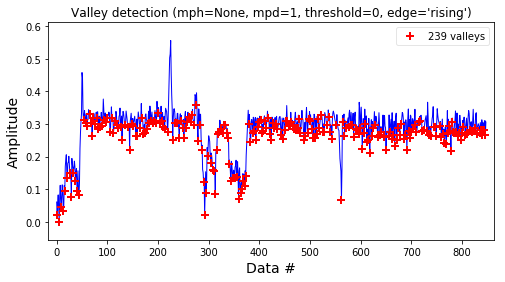

z 0.04102059136740954


In [36]:
cols = ['x', 'y', 'z']
# cols = ['x','y','z']

all_avg_diff = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk[df_walk['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.median(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff[i].append(avg_diff_pv)
        
all_avg_diff = np.array(all_avg_diff)

1001


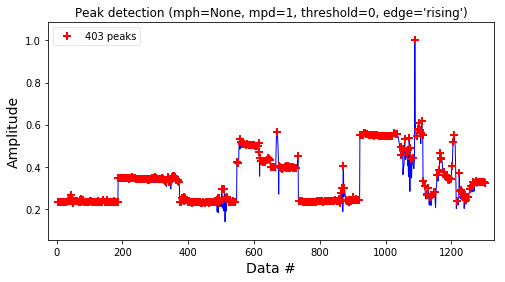

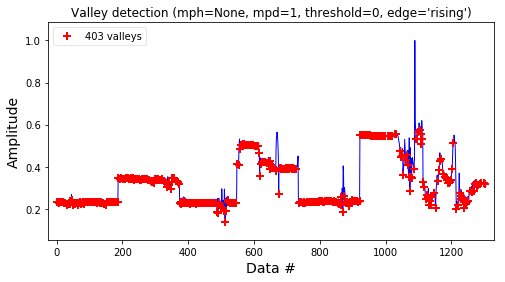

x 0.0041262571870192555


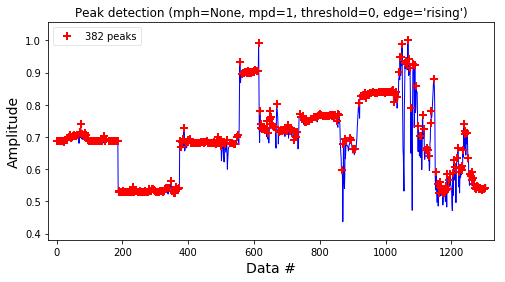

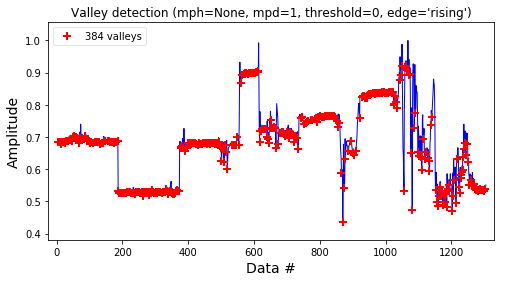

y 0.007893965536964975


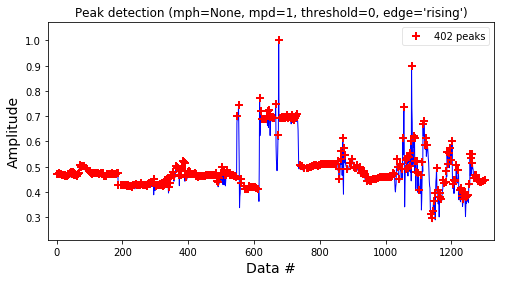

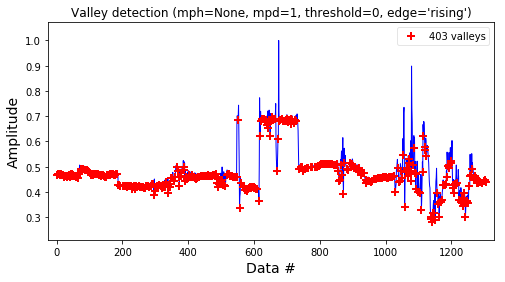

z 0.009357176069747064
1002


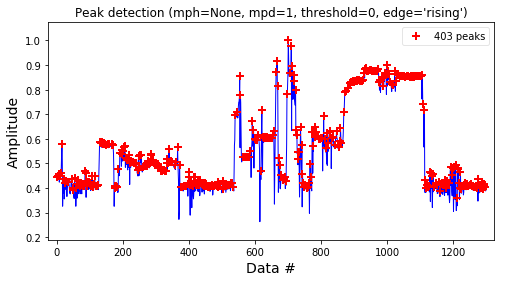

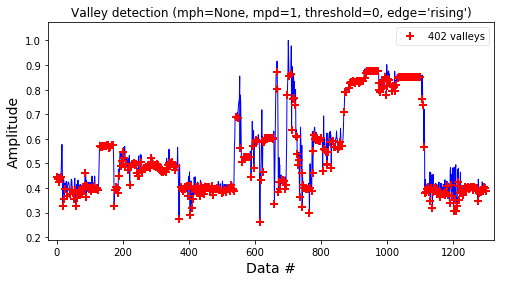

x 0.018691019715615265


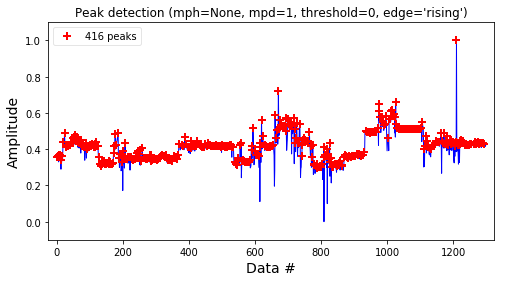

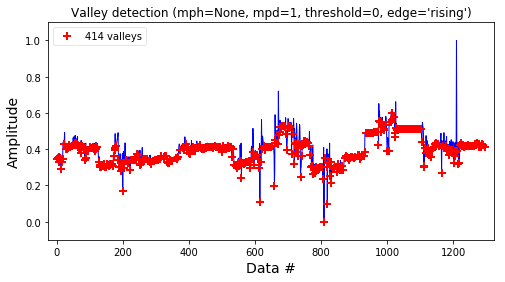

y 0.014653918823630374


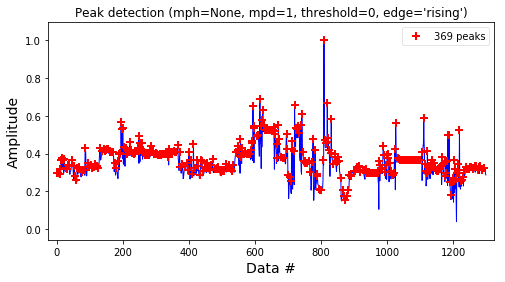

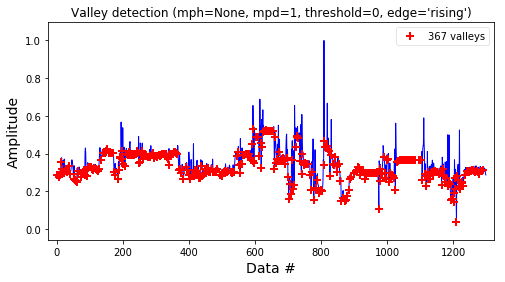

z 0.021924490304494726
1003


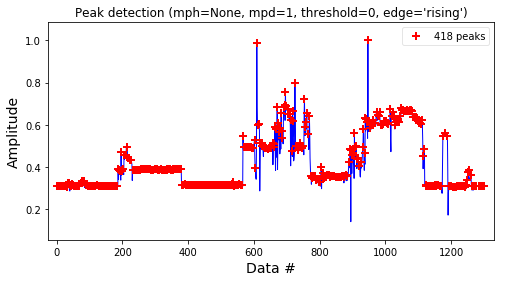

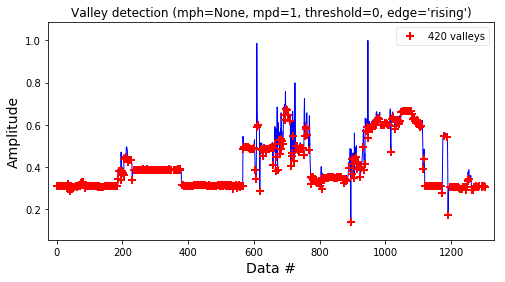

x 0.0037605505172201847


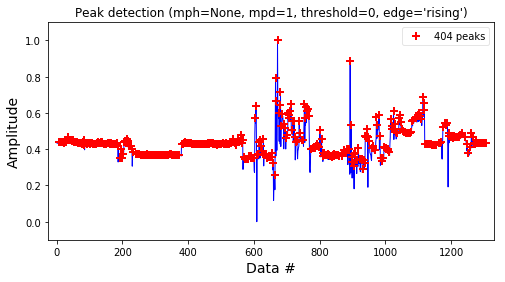

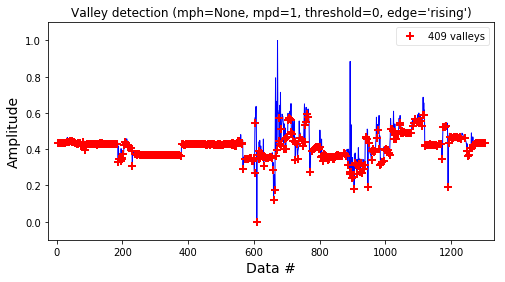

y 0.009817571515477463


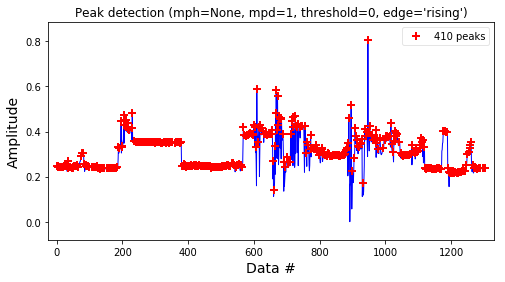

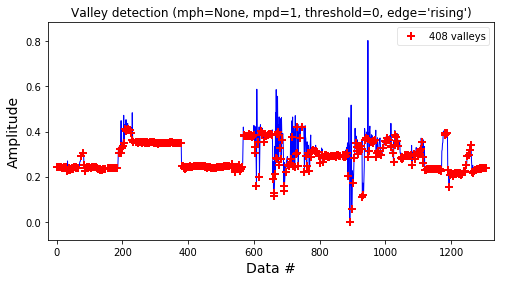

z 0.005219999900465955
1004


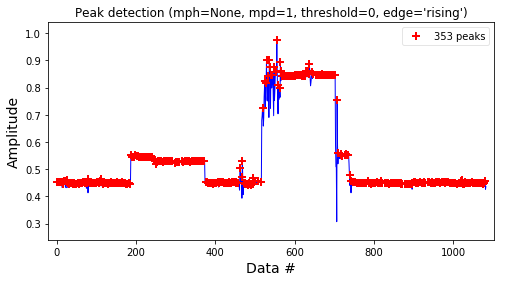

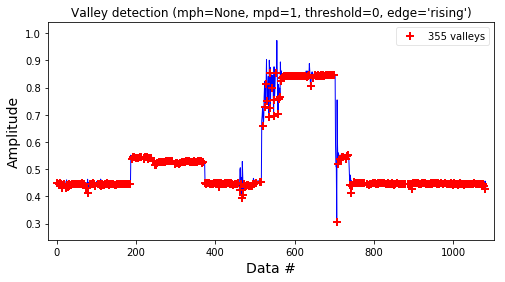

x 0.0029538081900178648


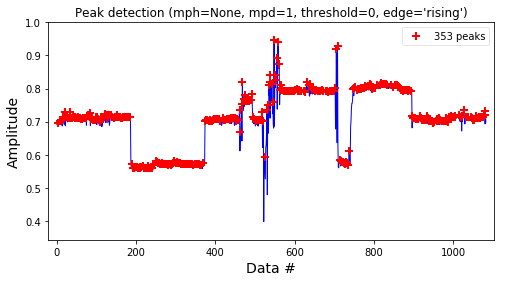

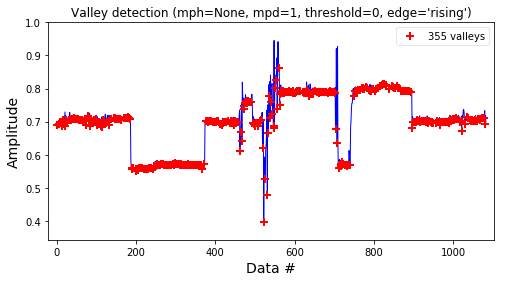

y 0.00570914252044441


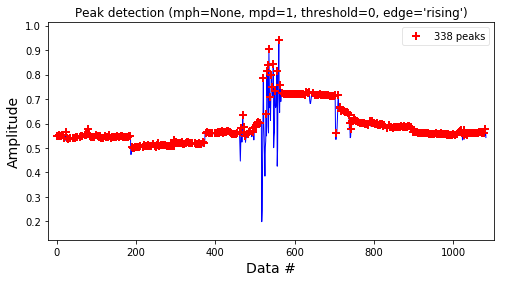

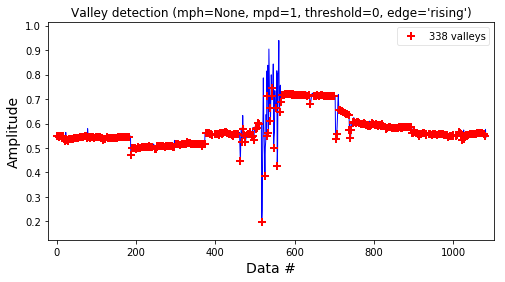

z 0.0037828042016817554
1005


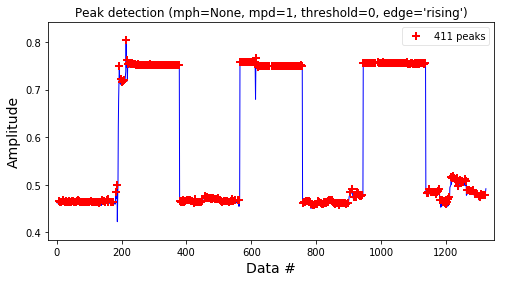

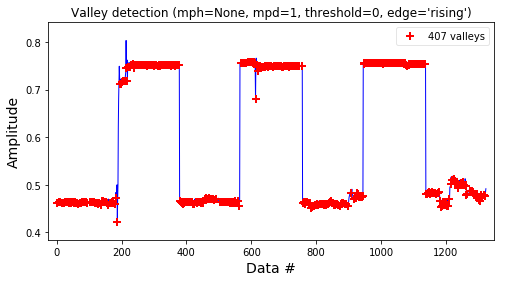

x 0.0014169313352009327


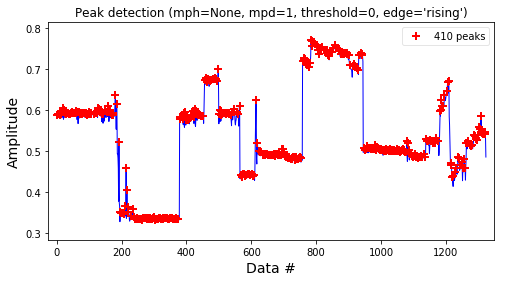

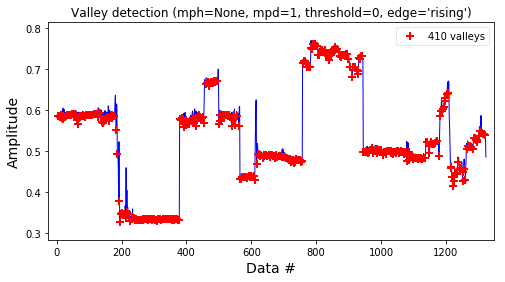

y 0.005443831554380774


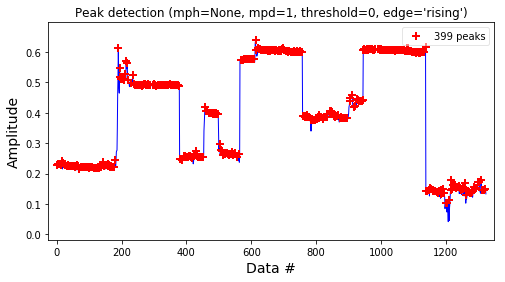

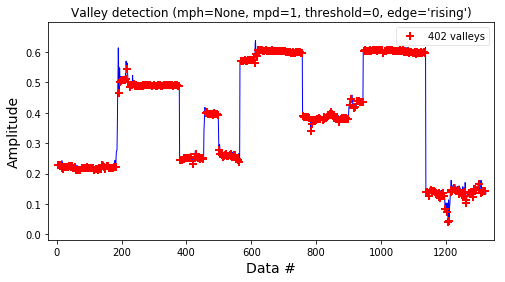

z 0.003643206241374347
1006


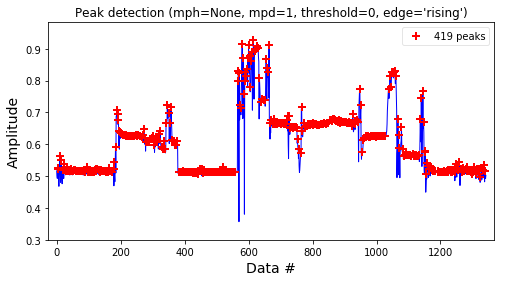

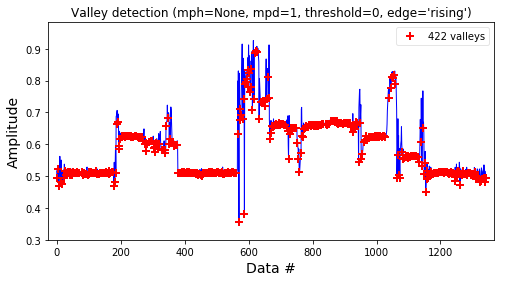

x 0.006396467644569193


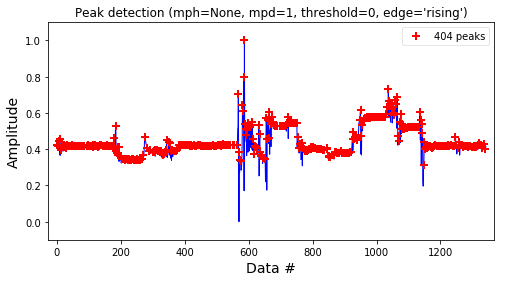

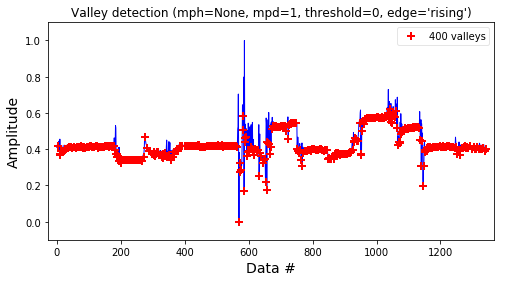

y 0.0059412252844078806


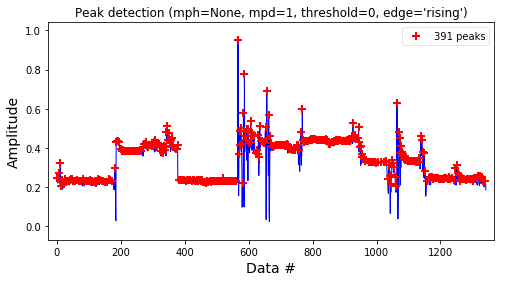

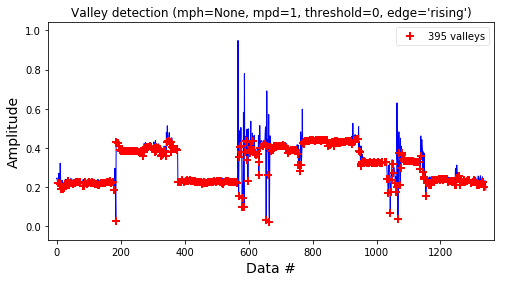

z 0.008274144978798581
1007


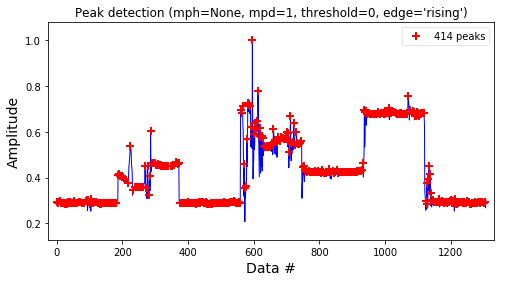

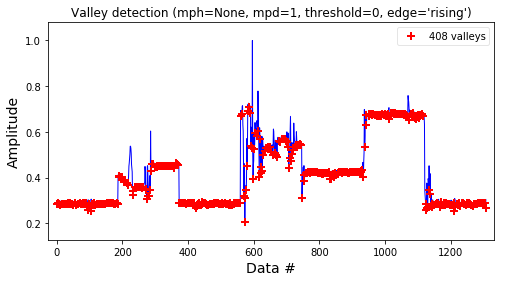

x 0.005533481540305196


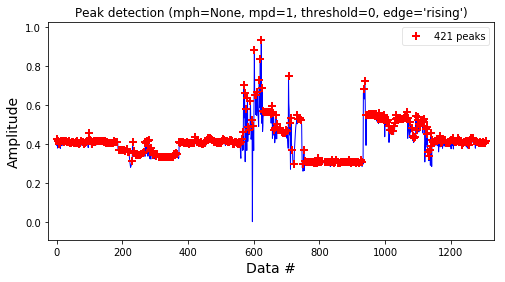

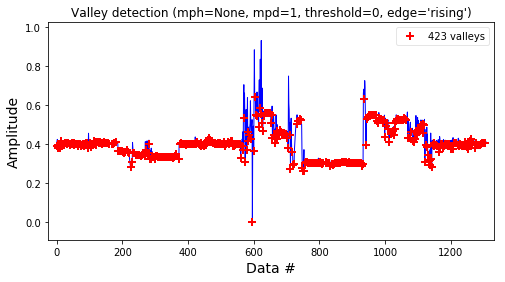

y 0.010440260426822029


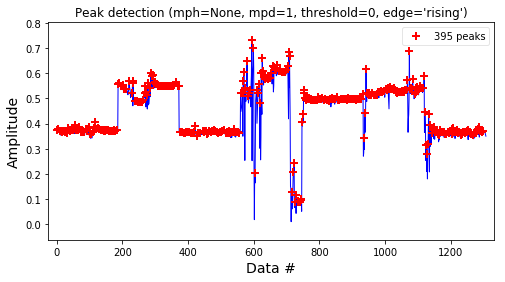

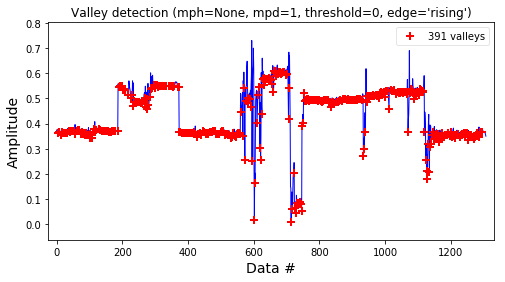

z 0.008291051161836177
1008


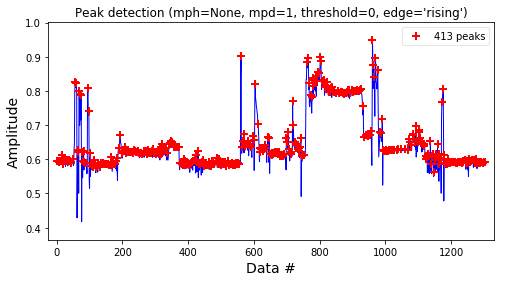

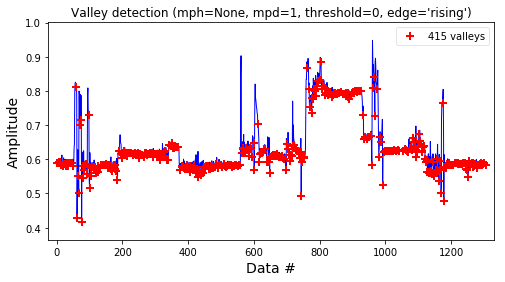

x 0.010763935192428353


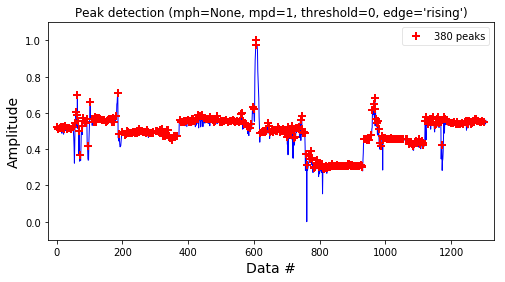

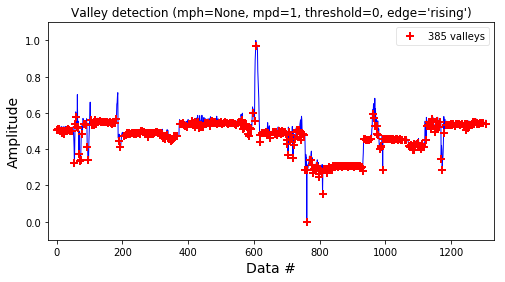

y 0.013098236207642389


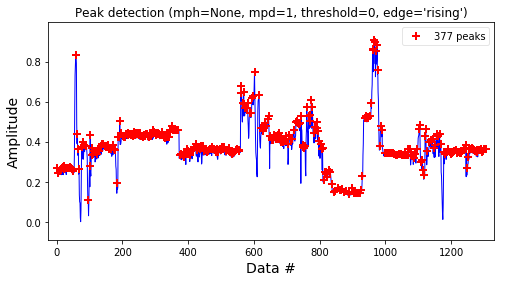

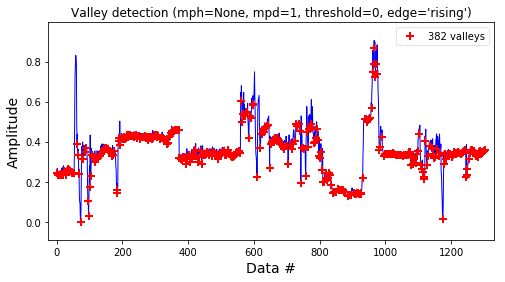

z 0.02286362320263549
1009


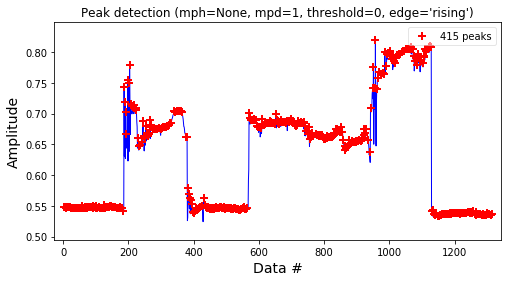

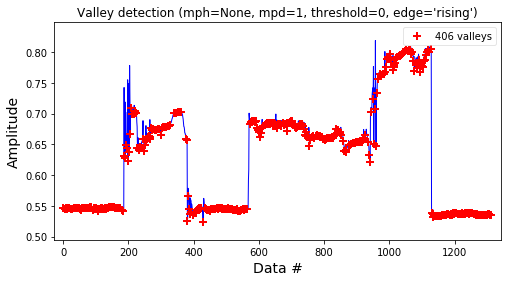

x 0.003606364784525362


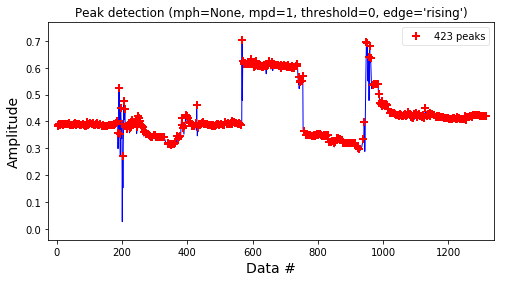

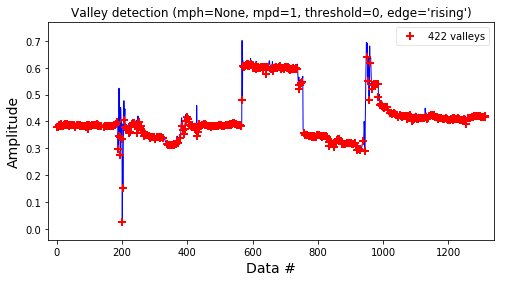

y 0.004329879678813819


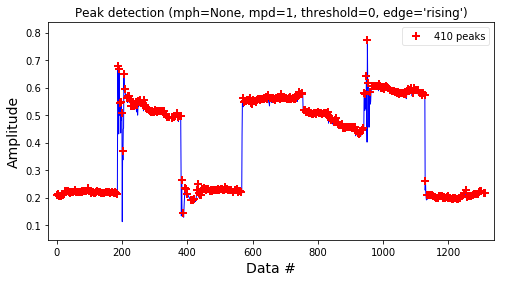

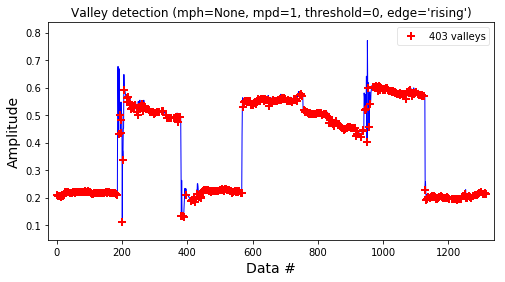

z 0.007955189450062017
1010


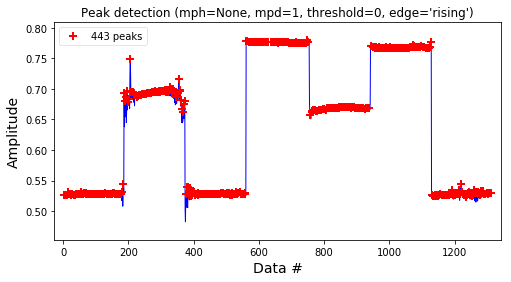

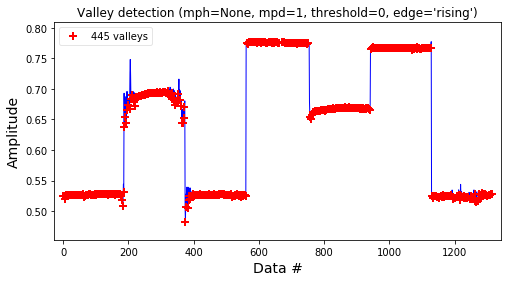

x 0.0012000111370176203


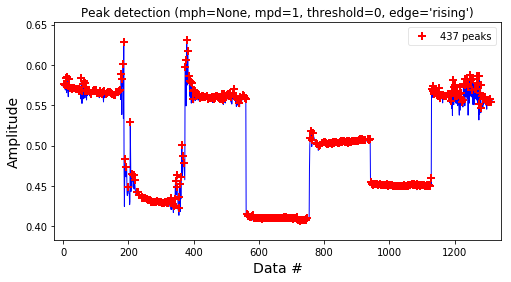

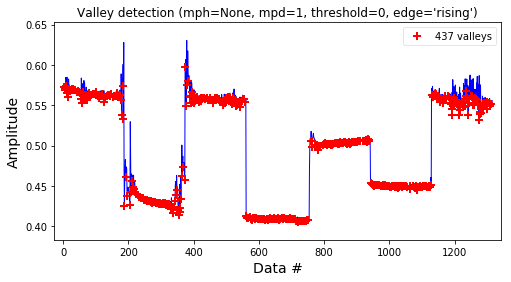

y 0.002414425112415297


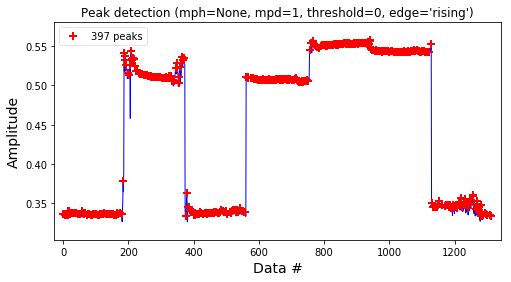

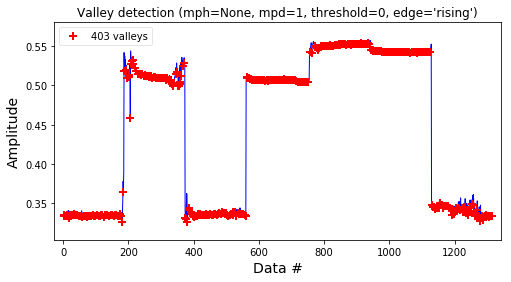

z 0.0012404327406578264
1011


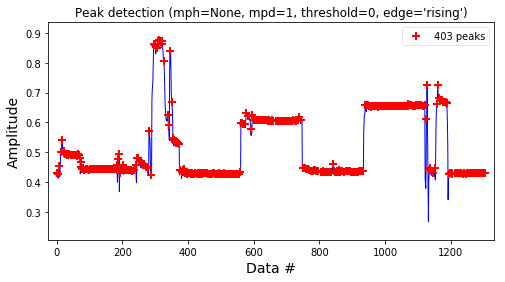

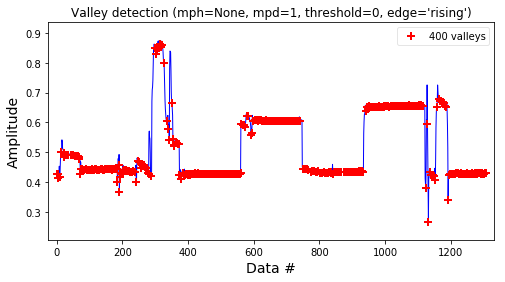

x 0.0015260422573027954


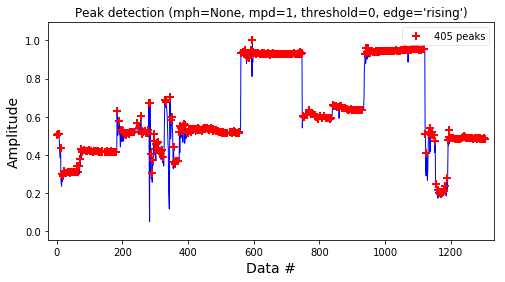

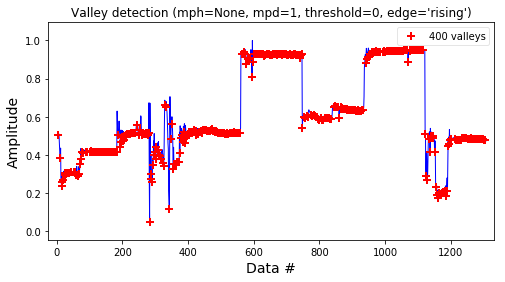

y 0.006387472025320529


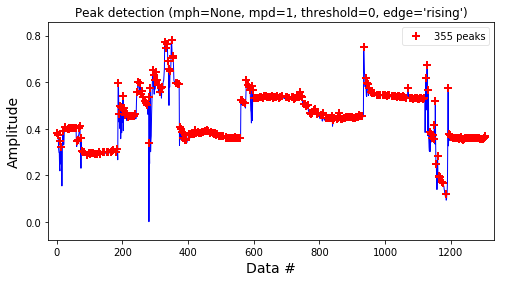

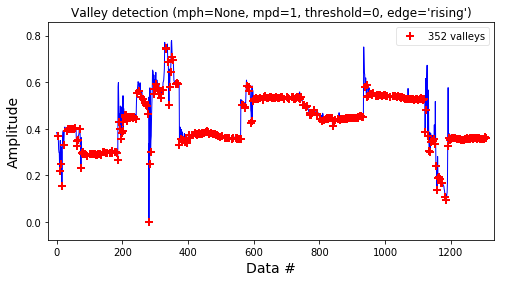

z 0.005853544778312458
1012


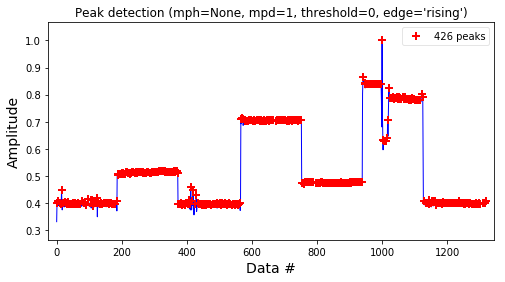

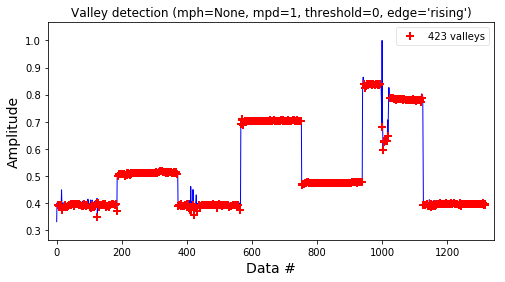

x 0.002046631928394771


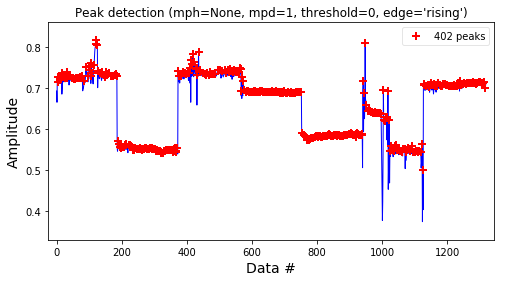

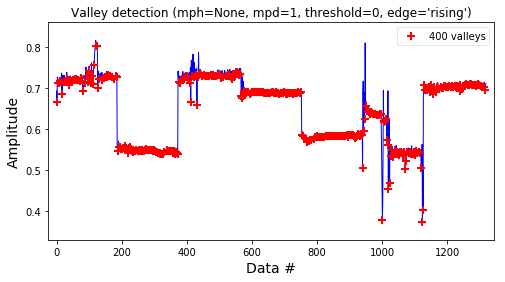

y 0.0036179059294592086


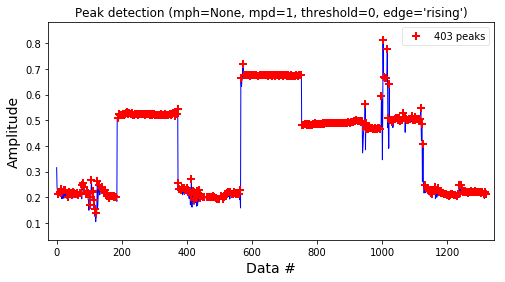

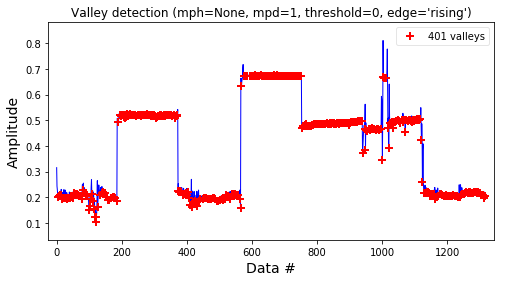

z 0.004045867402510006
1013


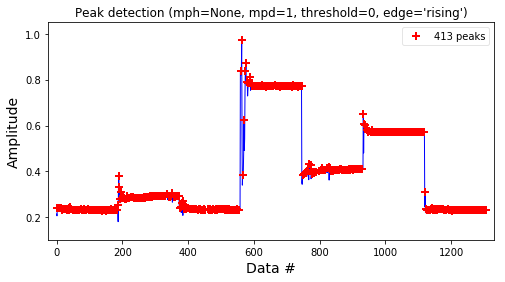

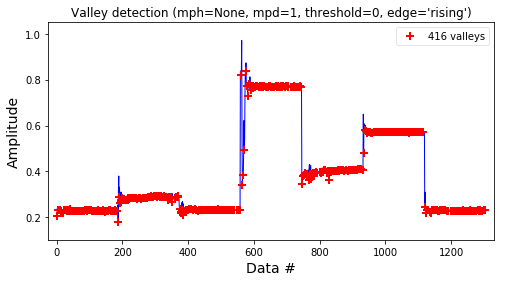

x 0.00277302168132737


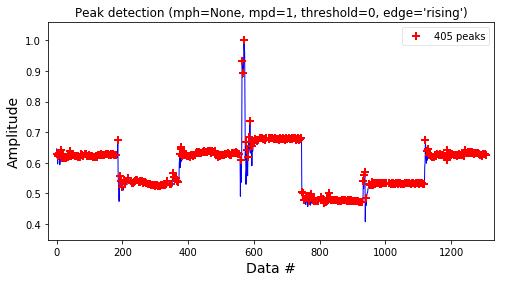

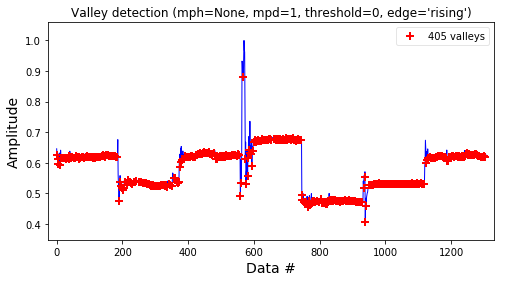

y 0.0038064566448443027


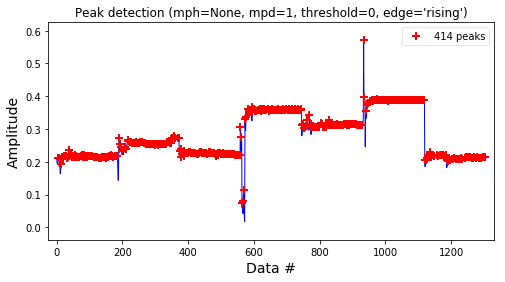

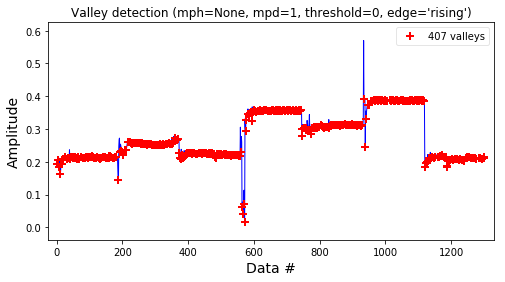

z 0.002477273729600965
1014


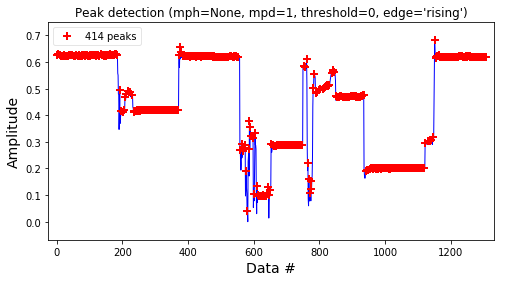

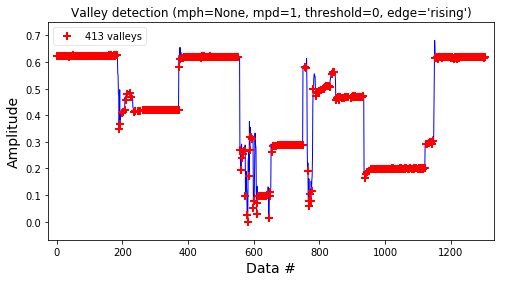

x 0.001648005299893729


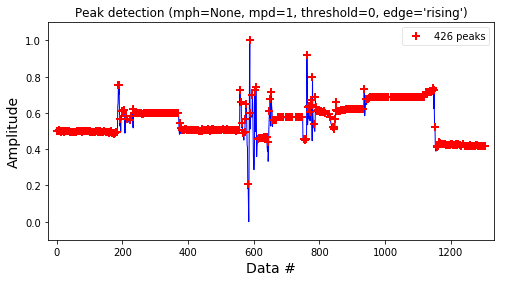

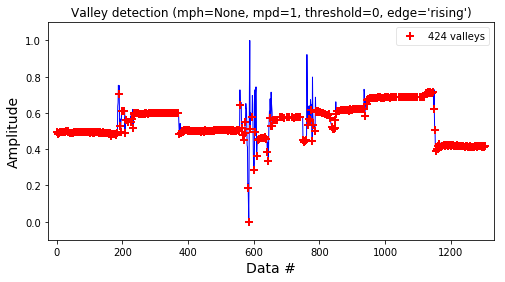

y 0.003788028536435062


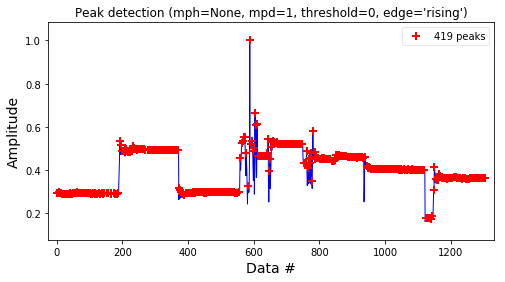

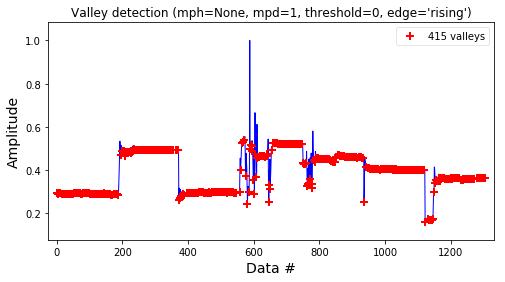

z 0.001652262524081849


In [37]:
cols = ['x', 'y', 'z']
# cols = ['x','y','z']

all_avg_diff_nw = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk[df_nonwalk['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.median(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw[i].append(avg_diff_pv)
        
all_avg_diff_nw = np.array(all_avg_diff_nw)

In [38]:
aad_t = all_avg_diff.transpose()

print('walking for patients')
for i in range(len(aad_t)):
    print(all_subjects[i], aad_t[i])
    
min_diff_walk = np.apply_along_axis(np.mean, 0, aad_t)
print('min', min_diff_walk)
    
print()
print('non-walking for patients')

aad_nw_t = all_avg_diff_nw.transpose()

for i in range(len(aad_nw_t)):
    print(all_subjects[i], aad_nw_t[i])
    
max_diff_nonwalk = np.apply_along_axis(np.mean, 0, aad_nw_t)
print('max', max_diff_nonwalk)

walking for patients
1001 [0.06512676 0.06965891 0.04439851]
1002 [0.12697838 0.03000152 0.04775947]
1003 [0.09267397 0.03344111 0.0351783 ]
1004 [0.08872357 0.0473952  0.06978485]
1005 [0.12164365 0.20822622 0.11766381]
1006 [0.1328922  0.02462182 0.07752393]
1007 [0.082649   0.04258963 0.04321295]
1008 [0.17096874 0.10942066 0.15226204]
1009 [0.12152343 0.06143021 0.07745852]
1010 [0.11124111 0.05467973 0.04687085]
1011 [0.05697207 0.06099006 0.06222209]
1012 [0.08905978 0.05708256 0.07934568]
1013 [0.08710548 0.04633628 0.04498191]
1014 [0.10127719 0.05496768 0.04102059]
min [0.10348824 0.06434583 0.06712025]

non-walking for patients
1001 [0.00412626 0.00789397 0.00935718]
1002 [0.01869102 0.01465392 0.02192449]
1003 [0.00376055 0.00981757 0.00522   ]
1004 [0.00295381 0.00570914 0.0037828 ]
1005 [0.00141693 0.00544383 0.00364321]
1006 [0.00639647 0.00594123 0.00827414]
1007 [0.00553348 0.01044026 0.00829105]
1008 [0.01076394 0.01309824 0.02286362]
1009 [0.00360636 0.00432988 0.0079

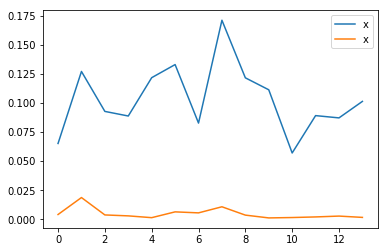

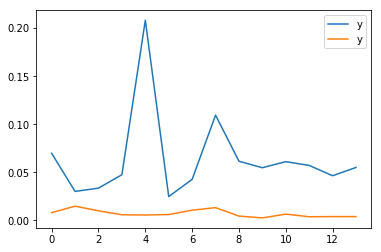

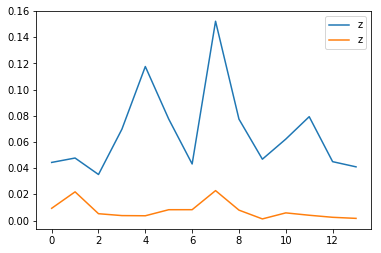

In [39]:
for i in range(3):
    plt.plot(np.transpose(aad_t)[i], label=cols[i])
    plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
#     plt.ylim((0,0.3))
    plt.legend()
    plt.show()

# for i in range(3):
#     plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
#     plt.ylim((0,0.3))
#     plt.legend()
# plt.show()

In [40]:
three_sec = 60   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']
threshold = [0.05, 0.035, 0.04]

exceed_thres = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk)-three_sec):
        df_walk_i = [df_walk.loc[j, c] for j in range(i,i+three_sec)]
#         print(len(df_walk_i))
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres[cl].append(exceed)

In [41]:
three_sec = 60   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']
threshold = [0.05, 0.035, 0.04]

exceed_thres_nw = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk)-three_sec):
        df_nonwalk_i = [df_nonwalk.loc[j, c] for j in range(i,i+three_sec)]
        
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres_nw[cl].append(exceed)

In [42]:
import seaborn as sns

walk (patients)


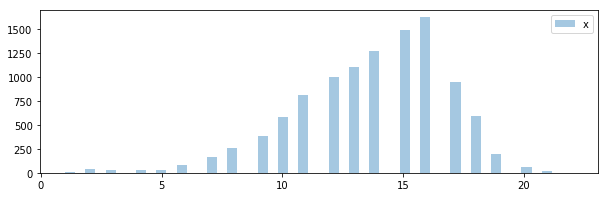

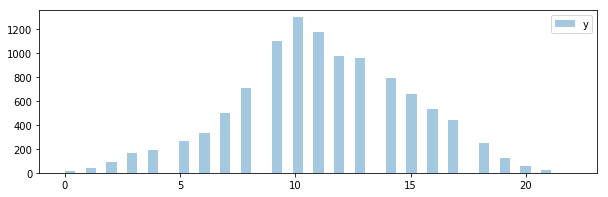

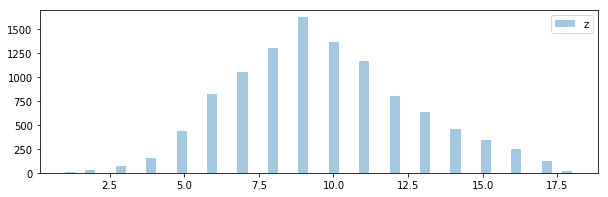

In [46]:
print('walk (patients)')
for i in range(3):
    f, axis = plt.subplots(figsize=(10,3))
    ax = sns.distplot(exceed_thres[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

non-walk (patients)


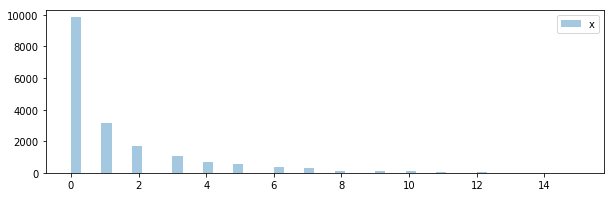

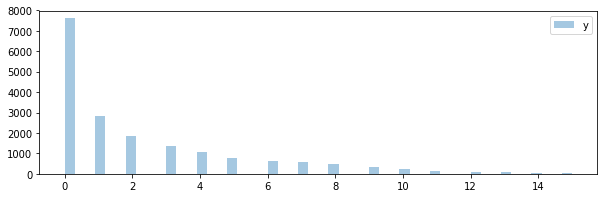

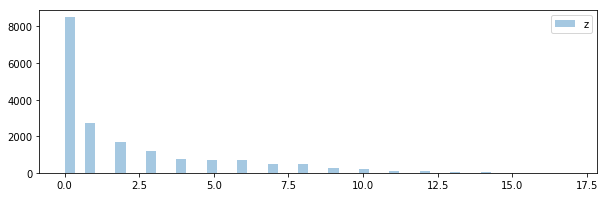

In [47]:
print('non-walk (patients)')
for i in range(3):
    f, axis = plt.subplots(figsize=(10,3))
    ax = sns.distplot(exceed_thres_nw[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
#     ax.set_ylim(0,200)

## Normal People

In [2]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
#     'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
#     'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
#     'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

NameError: name 'subj_all' is not defined

In [ ]:
df_rpy_1

In [ ]:
df_walk_1 = df_rpy_1[df_rpy_1['label']==label_dict['walk']]
df_walk_1 = df_walk_1.reset_index(drop=True)

In [ ]:
df_nonwalk_1 = df_rpy_1[df_rpy_1['label']!=label_dict['walk']]
df_nonwalk_1 = df_nonwalk_1.reset_index(drop=True)

In [ ]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_1 = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk_1[df_walk_1['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_1[i].append(avg_diff_pv)
        
all_avg_diff_1 = np.array(all_avg_diff_1)

In [ ]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw_1 = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk_1[df_nonwalk_1['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw_1[i].append(avg_diff_pv)
        
all_avg_diff_nw_1 = np.array(all_avg_diff_nw_1)

In [ ]:
aad_t_1 = all_avg_diff_1.transpose()

print('walking for normal people')
for i in range(len(aad_t_1)):
    print(all_subjects[i], aad_t_1[i])
    
aad_t_nw_1 = all_avg_diff_nw_1.transpose()

print()
print('non-walking for normal people')
for i in range(len(aad_t_nw_1)):
    print(all_subjects[i], aad_t_nw_1[i])

In [ ]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk_1)-three_sec, one_sec):
        df_walk_i = [df_walk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_1[cl].append(exceed)

In [54]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_nw_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk_1)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_nw_1[cl].append(exceed)

E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


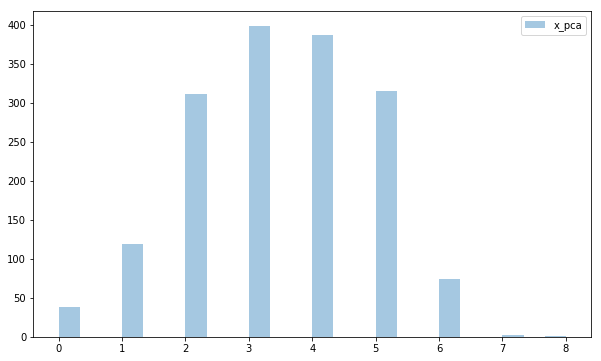

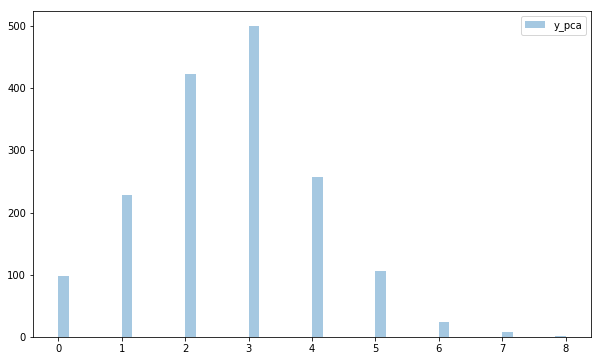

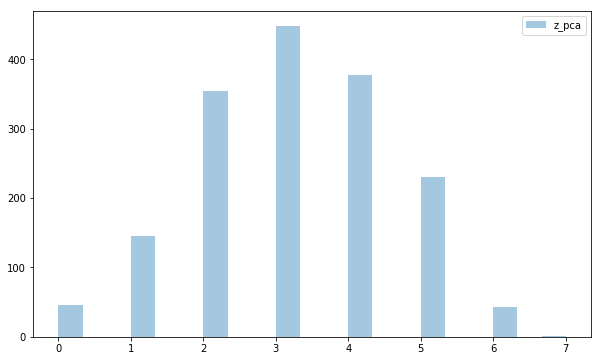

In [55]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


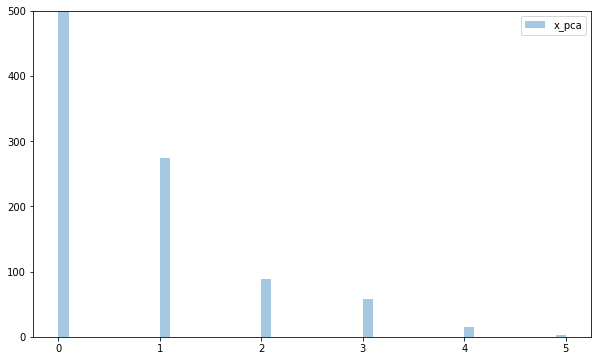

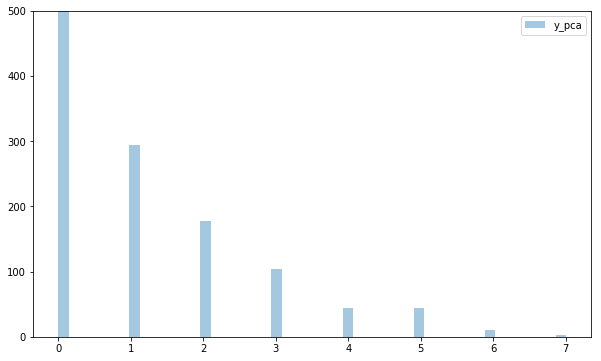

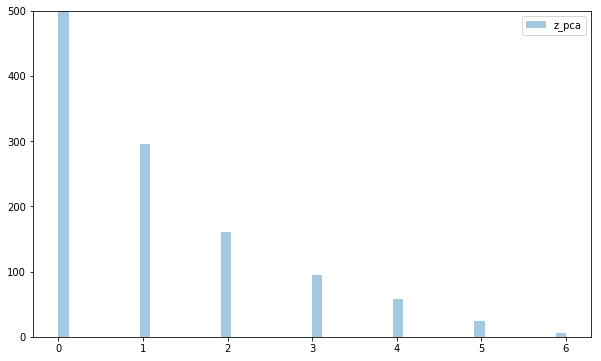

In [56]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,500)

# K-Nearest Neighbors

In [57]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [58]:
filename = basepath + 'model/knn_model.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [59]:
y_pred = nn_model.predict(X_test)

In [60]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [61]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [62]:
%run eval_score.ipynb

In [63]:
LABELS = ['sit','sleep','stand','walk']

0.865414710485133


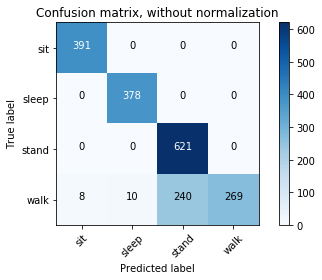

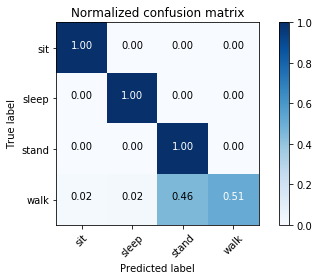

              precision    recall  f1-score   support

         sit       0.98      1.00      0.99       391
       sleep       0.97      1.00      0.99       378
       stand       0.72      1.00      0.84       621
        walk       1.00      0.51      0.68       527

   micro avg       0.87      0.87      0.87      1917
   macro avg       0.92      0.88      0.87      1917
weighted avg       0.90      0.87      0.85      1917



In [64]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.8628884826325411


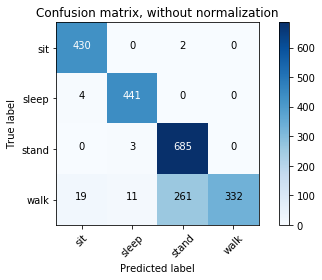

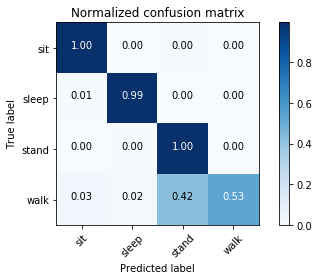

              precision    recall  f1-score   support

         sit       0.95      1.00      0.97       432
       sleep       0.97      0.99      0.98       445
       stand       0.72      1.00      0.84       688
        walk       1.00      0.53      0.70       623

   micro avg       0.86      0.86      0.86      2188
   macro avg       0.91      0.88      0.87      2188
weighted avg       0.90      0.86      0.85      2188



In [65]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [66]:
%run classifier_alg.ipynb

In [67]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_pca = df_rpy[cols]     # patients
df_pca_1 = df_rpy_1[cols] # normal_people

In [68]:
xyz_pca = np.array(df_pca.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [69]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [70]:
xyz_pca.shape, df_pca.shape

((10939, 60, 3), (10998, 3))

In [80]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [81]:
walk_pred

array([0, 0, 0, ..., 3, 3, 3])

In [82]:
walk_pred = np.array(walk_pred)

walk_pred.shape

(10939,)

In [83]:
walk_actual = np.array([3 if (df_rpy.loc[i, 'label']==3) else 0 for i in range(len(df_rpy))])

walk_actual.shape

(10998,)

In [84]:
print(walk_actual)

[0 0 0 ... 3 3 3]


## Walk Algorithm Evaluation

In [85]:
walk_lbl = ['NaN','walk']

0.8999908583965628


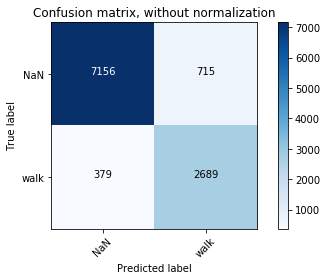

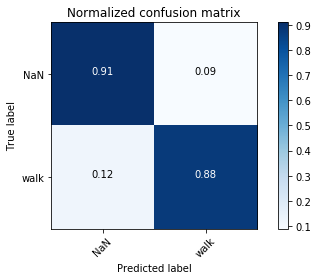

              precision    recall  f1-score   support

         NaN       0.95      0.91      0.93      7871
        walk       0.79      0.88      0.83      3068

   micro avg       0.90      0.90      0.90     10939
   macro avg       0.87      0.89      0.88     10939
weighted avg       0.90      0.90      0.90     10939



In [86]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [87]:
X_test_new = get_inverse_X(X_test)

X_test_new

array([[[ 0.96,  0.02,  0.13],
        [ 0.87,  0.02,  0.19],
        [ 0.84, -0.05,  0.19],
        ...,
        [ 1.11,  0.13,  0.23],
        [ 0.91, -0.06,  0.21],
        [ 0.88, -0.05,  0.24]],

       [[-0.55, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.55, -0.61,  0.45],
        ...,
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45]],

       [[-0.92, -0.13,  0.  ],
        [-0.81, -0.14,  0.02],
        [-1.17, -0.28, -0.  ],
        ...,
        [-1.07, -0.28, -0.07],
        [-0.73, -0.09, -0.05],
        [-0.83, -0.13, -0.03]],

       ...,

       [[-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        ...,
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41]],

       [[-1.04, -0.22, -0.08],
        [-0.9 , -0.15, -0.05],
        [-0.92, -0.2 , -0.04],
        ...,
        [-1.01, -0.18,  0.01],
        [-0.96, -0.22, -0.01],
        [-0.92,

In [88]:
walk_pred = classify_walk_2(X_test_new)

In [89]:
print(walk_pred)

[3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 

In [90]:
y_pred_new = combine_2(X_test_new, y_pred)

In [91]:
print(y_pred_new)

[3, 1, 3, 2, 2, 3, 1, 3, 3, 1, 1, 3, 3, 1, 0, 2, 0, 1, 2, 2, 0, 1, 3, 2, 1, 3, 0, 1, 2, 2, 1, 3, 2, 1, 2, 0, 0, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 0, 1, 1, 2, 2, 3, 1, 3, 0, 1, 3, 3, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 3, 1, 1, 0, 3, 3, 2, 1, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 0, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 1, 3, 0, 1, 0, 2, 0, 3, 3, 3, 2, 3, 0, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 3, 0, 1, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 3, 0, 3, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 3, 2, 0, 2, 1, 1, 0, 3, 1, 1, 3, 2, 3, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 3, 2, 3, 3, 2, 1, 3, 1, 0, 1, 1, 1, 2, 3, 0, 0, 3, 2, 0, 3, 3, 3, 2, 0, 3, 0, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 0, 1, 0, 2, 1, 1, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2, 2, 3, 0, 1, 2, 3, 2, 2, 0, 0, 0, 2, 

0.9379238393322901


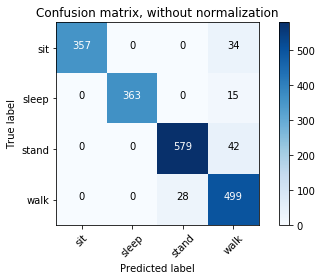

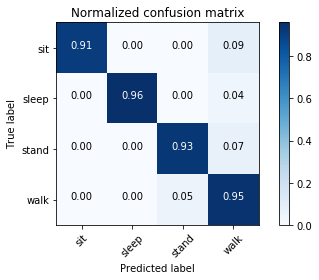

              precision    recall  f1-score   support

         sit       1.00      0.91      0.95       391
       sleep       1.00      0.96      0.98       378
       stand       0.95      0.93      0.94       621
        walk       0.85      0.95      0.89       527

   micro avg       0.94      0.94      0.94      1917
   macro avg       0.95      0.94      0.94      1917
weighted avg       0.94      0.94      0.94      1917



In [92]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [93]:
%run test_model.ipynb

In [94]:
filename = basepath + 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [95]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

call_functions(all_subjects, pca)

Loading 1001's data


KeyboardInterrupt: 

Loading 3001's data
Finished prediction


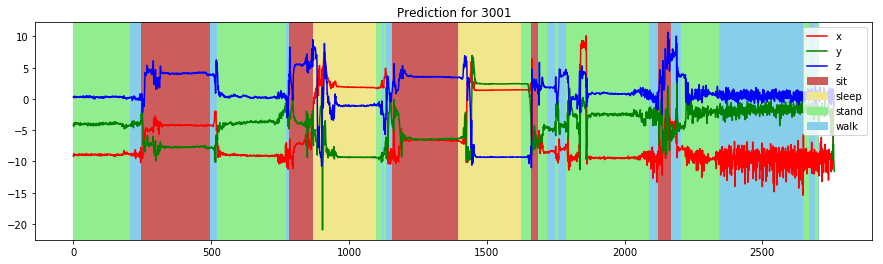

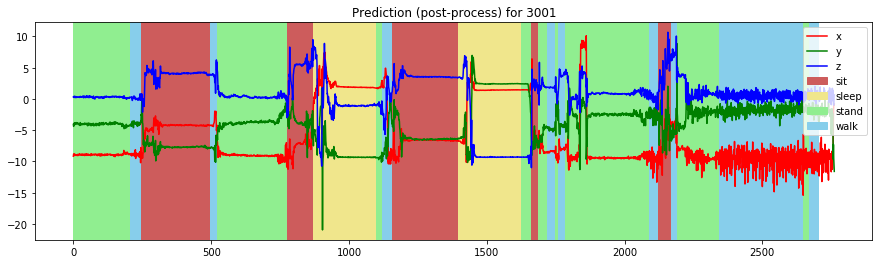

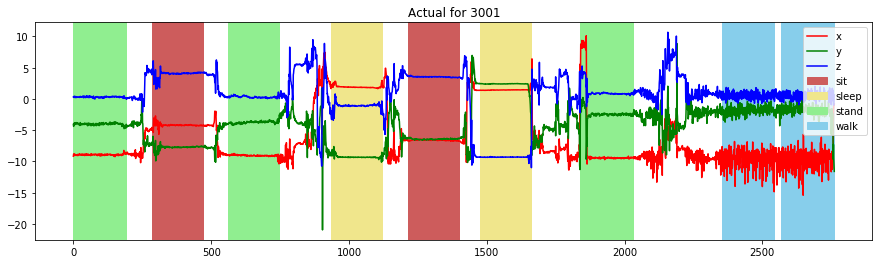

Loading 3002's data
Finished prediction


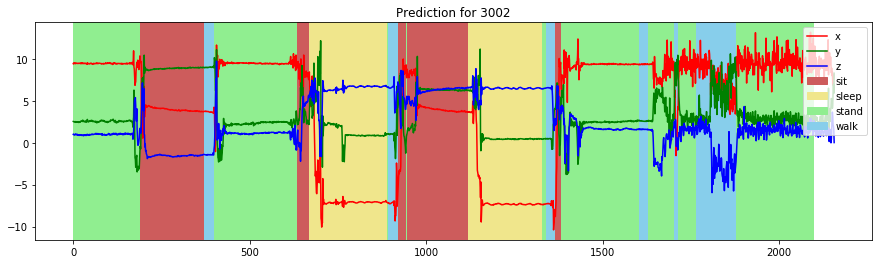

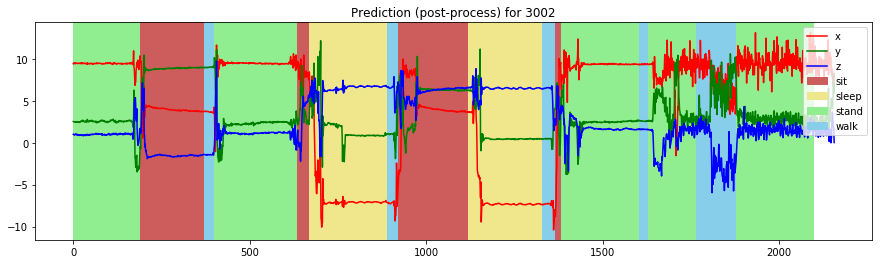

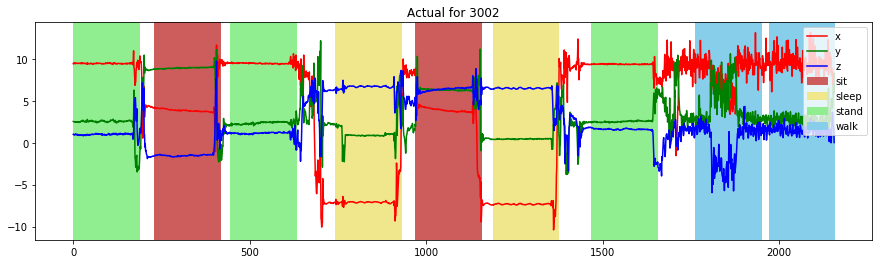

Loading 3003's data
Finished prediction


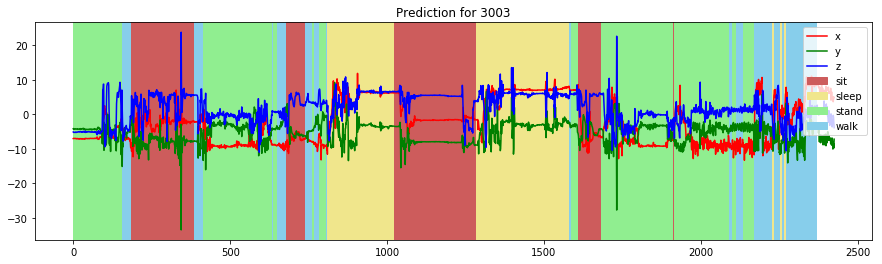

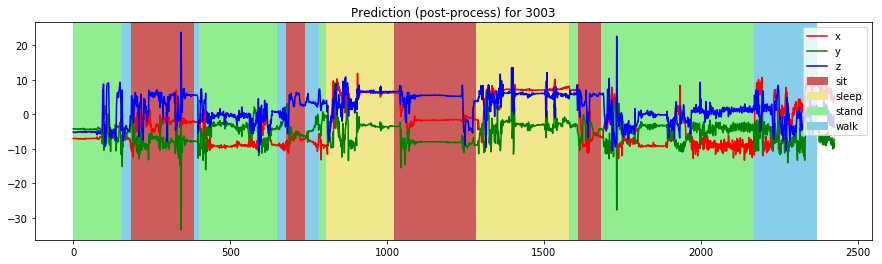

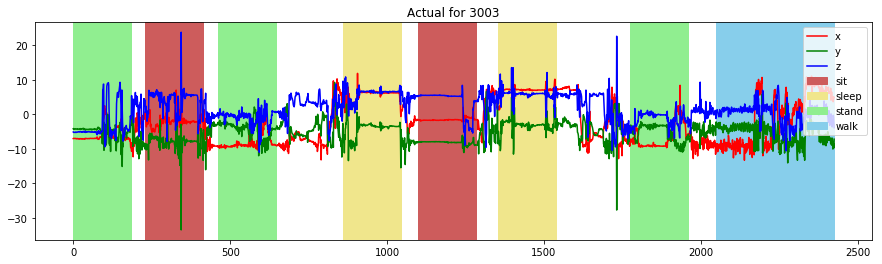

Loading 3004's data
Finished prediction


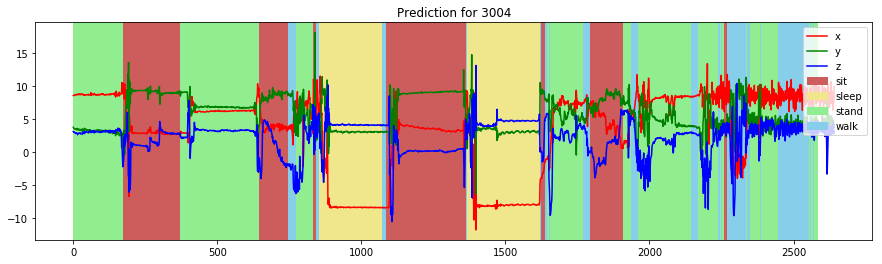

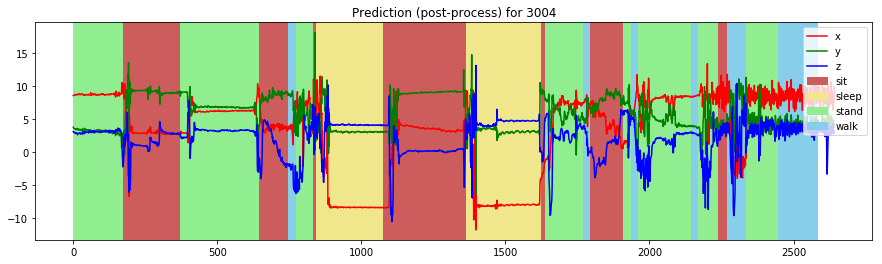

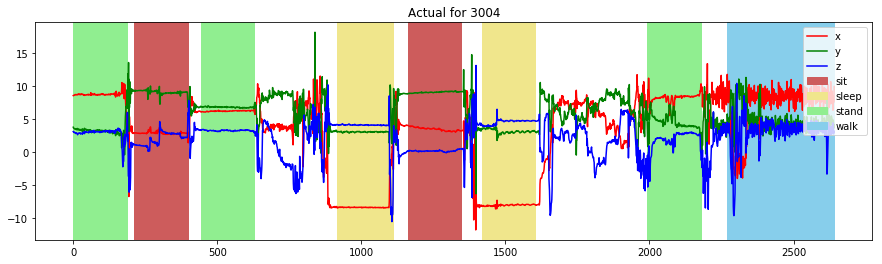

Loading 3005's data


In [ ]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects, pca_p)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
X_vis_imp = pd.DataFrame(X_vis_imp)

df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
cols = ['x','y','z']
df_test[cols]

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()